# Notebook : Notebook_generation_aleatoire_matrice_ordre.ipynb

# Génération d'un graphe non orienté aléatoire avec matrice d'adjacence pondérée
Ce notebook a pour objectif de générer un graphe non orienté, connexe et complet, avec des pondérations aléatoires représentant les coûts des routes.
Il permet également de simuler des routes en travaux (inutilisables) et de visualiser le graphe.

Nous utilisons :

- **NetworkX** pour la manipulation des graphes,

- **NumPy** pour la gestion des matrices,

- **Matplotlib** pour l'affichage visuel.

In [1]:
# Importation des bibliothèques nécessaires
import networkx as nx        # Manipulation de graphes
import numpy as np           # Création et gestion de matrices
import random                # Génération aléatoire de données
import matplotlib.pyplot as plt  # Affichage graphique
import pandas as pd #export csv
import os #export csv

In [2]:
# Fonction pour générer une matrice d'adjacence pondérée et l'ordre des villes à traverser
def generer_matrice_avec_ordre(n_sommets, cout_max=10, taux_travaux=0.2):
    # Création d'une matrice vide de taille n_sommets x n_sommets, initialisée à 0
    matrice = np.zeros((n_sommets, n_sommets), dtype=int)
    
    # Étape 1 : Génération d’un arbre couvrant pour garantir la connexité du graphe
    sommets = list(range(n_sommets))
    random.shuffle(sommets)  # Mélange des sommets pour créer des arêtes aléatoires
    
    # Création de l'arbre couvrant (cela garantit la connexité du graphe)
    for i in range(n_sommets - 1):
        a, b = sommets[i], sommets[i + 1]  # Sélection aléatoire de deux sommets à connecter
        cout = random.randint(1, cout_max)  # Génération aléatoire du coût pour cette arête
        matrice[a][b] = cout  # Ajout de l'arête dans la matrice d'adjacence
        matrice[b][a] = cout  # La matrice est symétrique pour un graphe non orienté
    
    # Étape 2 : Compléter la matrice pour obtenir un graphe complet
    for i in range(n_sommets):
        for j in range(i + 1, n_sommets):  # Nous parcourons uniquement les éléments au-dessus de la diagonale
            if matrice[i][j] == 0:  # Si l'arête n'existe pas encore (valeur 0)
                if random.random() < taux_travaux:  # Si un taux de travail est rencontré, rendre l'arête inutilisable
                    val = -1  # Route en travaux
                else:
                    val = random.randint(1, cout_max)  # Génération d'un coût aléatoire pour une route praticable
                matrice[i][j] = val  # Ajout de l'arête dans la matrice
                matrice[j][i] = val  # La matrice est symétrique pour un graphe non orienté
    
    np.fill_diagonal(matrice, 0)  # On ne laisse aucune boucle (i.e., une arête reliant un sommet à lui-même)
    
    # Étape 3 : Ordonnancement aléatoire des villes à traverser
    villes_a_ordonner = random.sample(range(n_sommets), k=2)  # Sélection d'un sous-ensemble de villes à ordonnancer
    ordre = random.sample(villes_a_ordonner, len(villes_a_ordonner))  # Ordre de passage aléatoire
    
    # Ajout 1 à chaque ville pour que l'ordre commence à 1
    ordre = [v + 1 for v in ordre]
    
    print(f"Points collectes: {ordre}")
    
    # Modification des coûts pour refléter l'ordonnancement
    for i in range(len(ordre) - 1):
        a, b = ordre[i], ordre[i + 1]  # Connexion entre les villes dans l'ordre
        matrice[a - 1][b - 1] += 10  # Augmentation du coût pour l'ordre de passage
        matrice[b - 1][a - 1] += 10  # Assurer la symétrie

    # Étape 4 : Vérification de la connexité du graphe
    G = nx.Graph()  # Création d'un objet graphe vide avec NetworkX
    for i in range(n_sommets):
        for j in range(i + 1, n_sommets):  # On parcourt toutes les paires de sommets
            if matrice[i][j] > 0:  # Seules les arêtes avec un coût positif sont ajoutées
                G.add_edge(i, j)  # Ajout de l'arête au graphe

    # Si le graphe n'est pas connexe, on ajoute des arêtes pour le rendre connexe
    if not nx.is_connected(G):  # Vérification de la connexité
        composants = list(nx.connected_components(G))  # Identification des composants connexes
        for k in range(len(composants) - 1):  # Si plusieurs composants existent, les relier
            u = random.choice(list(composants[k]))  # Choisir un sommet de chaque composant
            v = random.choice(list(composants[k + 1]))
            cout = random.randint(1, cout_max)  # Générer un coût pour l'arête
            matrice[u][v] = cout  # Ajouter l'arête au graphe
            matrice[v][u] = cout  # Assurer la symétrie

    return matrice, ordre  # Retourner la matrice d'adjacence et l'ordre des villes

## Fonction : `generer_matrice_avec_ordre`

Cette fonction génère une **matrice d’adjacence** représentant un graphe **connexe et complet**, avec :
- Un **arbre couvrant** pour assurer la connexité
- Un **remplissage aléatoire** pour obtenir la complétude
- Un **taux de routes en travaux** (valeur `-1`)
- Un **points de collectes** aléatoire

Elle garantit que toutes les paires de sommets sont connectées, même si certaines routes sont inutilisables (en travaux).


In [3]:
# Fonction pour afficher la matrice d'adjacence sous forme de liste lisible
def afficher_matrice_liste(matrice):
    # Affichage lisible de la matrice sous forme de liste de listes
    print("[")
    for ligne in matrice:
        print("    " + str(list(map(int, ligne))) + ",")
    print("]")

## Fonction : `afficher_matrice_liste`

Cette fonction affiche la matrice d’adjacence sous la forme d’une **liste de listes**.
Cela permet une lecture plus claire qu’un simple affichage brut avec NumPy.


In [4]:
# Fonction pour afficher le graphe sous forme de visualisation
def afficher_graphe(matrice):
    G = nx.Graph()  # Création d'un graphe vide
    
    n_sommets = len(matrice)  # Nombre de sommets dans la matrice
    
    # Ajout des arêtes au graphe en fonction de la matrice d'adjacence
    for i in range(n_sommets):
        for j in range(i + 1, n_sommets):
            poids = matrice[i][j]  # Poids de l'arête entre les sommets i et j
            if poids != 0:  # On ignore les arêtes ayant un poids de 0 (diagonales)
                # Ajout de l'arête avec l'attribut 'travaux' pour savoir si l'arête est en travaux
                G.add_edge(i + 1, j + 1, weight=poids, travaux=(poids == -1))

    # Positionnement des sommets de manière automatique
    pos = nx.spring_layout(G, seed=42)
    
    # Définition des couleurs des arêtes : rouge pour les routes en travaux, gris pour les autres
    edge_colors = ['red' if G[u][v]['travaux'] else 'gray' for u, v in G.edges()]
    
    # Préparation des étiquettes des arêtes (affichage des poids sauf pour les routes en travaux)
    edge_labels = {
        (u, v): ('' if G[u][v]['travaux'] else G[u][v]['weight']) for u, v in G.edges()
    }

    # Affichage du graphe avec Matplotlib
    plt.figure(figsize=(10, 8))
    nx.draw(
        G, pos, with_labels=True, node_color='skyblue', node_size=600,
        edge_color=edge_colors, width=2, font_weight='bold'
    )
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')
    plt.title("Graphe Complet – Routes praticables (gris), en travaux (rouge)")
    plt.show()

## Fonction : `afficher_graphe`

Cette fonction convertit la matrice d’adjacence en un graphe `NetworkX` et l'affiche visuellement avec `Matplotlib`.

- Les **routes praticables** (coût > 0) sont en **gris** avec leur poids.
- Les **routes en travaux** (coût = -1) sont en **rouge**, sans étiquette de poids.


In [5]:
# Fonction pour exporter la matrice et l'ordre des villes au format CSV
def exporter_csv(matrice, ordre, nom_fichier="matrice_routes_ordre_generation_aleatoire.csv"):
    chemin_fichier = os.path.join("data", nom_fichier)  # Définition du chemin d'exportation
    
    # Création du DataFrame pour la matrice d'adjacence
    df_matrice = pd.DataFrame(matrice)
    
    # Création du DataFrame pour l'ordre des villes
    df_ordre = pd.DataFrame([ordre])
    
    # Exportation des données au format CSV
    with open(chemin_fichier, mode="w", newline="") as f:
        df_matrice.to_csv(f, header=False, index=False, sep=";")  # Export de la matrice
        f.write("\n")  # Ligne vide pour séparer les deux sections
        df_ordre.to_csv(f, header=False, index=False, sep=";")  # Export de l'ordre des villes
    
    print(f"Matrice et ordre exportés avec succès vers « {nom_fichier} »")


## Fonction : `exporter_csv`

Cette fonction exporte la matrice d’adjacence et l’ordre des villes dans un fichier CSV, dans un dossier `data/`.

Le fichier CSV contient :
- La **matrice d’adjacence** (séparée par `;`)
- Une **ligne vide**
- Une **ligne contenant l’ordre de passage des villes**


Points collectes: [5, 6]
[
    [0, 185, 12, 146, 26, 8, 150, 171, 109, 43],
    [185, 0, 97, 42, 94, 167, -1, 186, 161, 134],
    [12, 97, 0, 80, 37, -1, 128, 94, 92, 141],
    [146, 42, 80, 0, -1, 109, 124, 197, -1, 40],
    [26, 94, 37, -1, 0, 208, -1, 62, 196, 190],
    [8, 167, -1, 109, 208, 0, -1, 20, 16, 65],
    [150, -1, 128, 124, -1, -1, 0, 44, 26, 170],
    [171, 186, 94, 197, 62, 20, 44, 0, 74, 53],
    [109, 161, 92, -1, 196, 16, 26, 74, 0, 184],
    [43, 134, 141, 40, 190, 65, 170, 53, 184, 0],
]


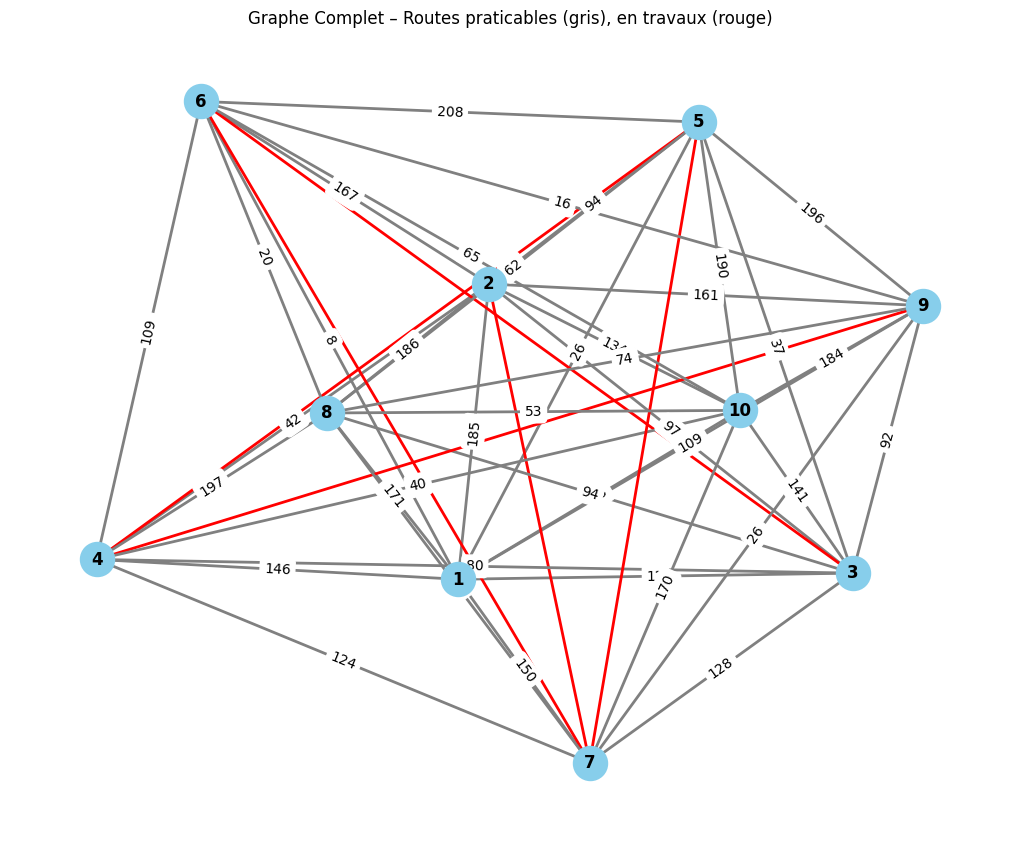

Matrice et ordre exportés avec succès vers « matrice_routes_ordre_generation_aleatoire.csv »


In [6]:
# Génère la matrice avec l'ordonnancement
matrice, ordre = generer_matrice_avec_ordre(n_sommets=10, cout_max=200, taux_travaux=0.2)

# Affichage de la matrice
afficher_matrice_liste(matrice)

# Visualisation du graphe
afficher_graphe(matrice)

# Exportation de la matrice
exporter_csv(matrice, ordre)


Cette cellule utilise les fonctions précédentes pour :
- Générer une matrice de graphe avec 8 sommets, sans routes absentes.
- Afficher la matrice correspondante.
- Visualiser le graphe avec les routes praticables et celles en travaux.


# Notebook : Exacte/PLNE.ipynb

In [ ]:
import pandas as pd
import pulp
import time

# === Chargement des données ===
df = pd.read_csv(r"data\matrice_routes_ordre_generation_aleatoire.csv", header=None)

# Lire les points de collecte depuis la dernière ligne
collect_line = df.iloc[-1, 0]
points_collecte = list(map(int, collect_line.split(';')))
points_collecte = [p - 1 for p in points_collecte]  # base 1 → base 0
non_collecte = [i for i in range(len(df) - 1) if i not in points_collecte]

# Nettoyer la matrice
df = df.iloc[:-1]
adj_matrix = df[0].str.split(';').apply(lambda x: list(map(int, x)))
cost_matrix = pd.DataFrame(adj_matrix.tolist())
INF = 10**6
cost_matrix = cost_matrix.replace(-1, INF)
n = cost_matrix.shape[0]

# === Modèle MILP ===
prob = pulp.LpProblem("TSP_with_Collecte_Constraints", pulp.LpMinimize)
x = pulp.LpVariable.dicts("x",
    ((i, j) for i in range(n) for j in range(n)
     if i != j and cost_matrix.iloc[i, j] < INF), cat='Binary')
u = pulp.LpVariable.dicts("u", range(n), lowBound=0, upBound=n-1, cat='Integer')

# Objectif
prob += pulp.lpSum(cost_matrix.iloc[i, j] * x[i, j] for (i, j) in x)

# Visite unique
for i in range(n):
    prob += pulp.lpSum(x[i, j] for j in range(n) if (i, j) in x) == 1
    prob += pulp.lpSum(x[j, i] for j in range(n) if (j, i) in x) == 1

# Sous-tours (MTZ)
for i in range(1, n):
    for j in range(1, n):
        if i != j and (i, j) in x:
            prob += u[i] - u[j] + n * x[i, j] <= n - 1

# ✅ Contrainte : départ → point de collecte
prob += pulp.lpSum(x[0, j] for j in points_collecte if (0, j) in x) == 1

# ✅ Contrainte : retour ← ville non-collecte
prob += pulp.lpSum(x[i, 0] for i in non_collecte if (i, 0) in x) == 1

# === Résolution chronométrée ===
solver = pulp.PULP_CBC_CMD(msg=True, timeLimit=300)
start_time = time.time()
prob.solve(solver)
end_time = time.time()
elapsed = end_time - start_time

# === Reconstruction de la tournée ===
tour_dict = {i: j for (i, j) in x if pulp.value(x[i, j]) > 0.5}
start = 0
tour = [start]
while True:
    next_city = tour_dict.get(tour[-1])
    if next_city is None or next_city == start:
        break
    tour.append(next_city)
tour.append(start)

# === Affichage ===
print("📊 Statut :", pulp.LpStatus[prob.status])
print(f"⏱️ Temps de résolution : {elapsed:.2f} secondes")
print("📦 Points de collecte :", [p + 1 for p in points_collecte])
print("💰 Coût total :", pulp.value(prob.objective))
print("🚗 Tournée (ordre réel) :")
for i in range(len(tour) - 1):
    print(f"{tour[i]+1} → {tour[i+1]+1}")


📊 Statut : Optimal
⏱️ Temps de résolution : 16.21 secondes
📦 Points de collecte : [34, 9]
💰 Coût total : 534.0
🚗 Tournée (ordre réel) :
1 → 34
34 → 29
29 → 47
47 → 14
14 → 49
49 → 8
8 → 31
31 → 37
37 → 23
23 → 20
20 → 15
15 → 26
26 → 12
12 → 10
10 → 9
9 → 41
41 → 32
32 → 4
4 → 40
40 → 17
17 → 7
7 → 33
33 → 16
16 → 48
48 → 25
25 → 5
5 → 39
39 → 35
35 → 21
21 → 38
38 → 3
3 → 19
19 → 6
6 → 44
44 → 50
50 → 30
30 → 42
42 → 28
28 → 22
22 → 13
13 → 11
11 → 45
45 → 46
46 → 18
18 → 43
43 → 24
24 → 2
2 → 27
27 → 36
36 → 1


In [ ]:
import pandas as pd
import pulp
import time
import matplotlib.pyplot as plt

file_list = [
    r"data/matrice_routes_ordre_10.csv",
    r"data/matrice_routes_ordre_20.csv",
    r"data/matrice_routes_ordre_30.csv",
    r"data/matrice_routes_ordre_40_Difficile.csv",
    r"data/matrice_routes_ordre_50.csv",
    r"data/matrice_routes_ordre_75.csv",
    r"data/matrice_routes_ordre_100.csv"
]

results = []

for file in file_list:
    df = pd.read_csv(file, header=None)

    # Points de collecte
    collect_line = df.iloc[-1, 0]
    points_collecte = list(map(int, collect_line.split(';')))
    points_collecte = [p - 1 for p in points_collecte]
    non_collecte = [i for i in range(len(df) - 1) if i not in points_collecte]

    # Nettoyage de la matrice
    df = df.iloc[:-1]
    adj_matrix = df[0].str.split(';').apply(lambda x: list(map(int, x)))
    cost_matrix = pd.DataFrame(adj_matrix.tolist())
    INF = 10**6
    cost_matrix = cost_matrix.replace(-1, INF)
    n = cost_matrix.shape[0]

    # Modèle MILP
    prob = pulp.LpProblem("TSP", pulp.LpMinimize)
    x = pulp.LpVariable.dicts("x", ((i, j) for i in range(n) for j in range(n)
                                    if i != j and cost_matrix.iloc[i, j] < INF), cat='Binary')
    u = pulp.LpVariable.dicts("u", range(n), lowBound=0, upBound=n-1, cat='Integer')

    prob += pulp.lpSum(cost_matrix.iloc[i, j] * x[i, j] for (i, j) in x)

    for i in range(n):
        prob += pulp.lpSum(x[i, j] for j in range(n) if (i, j) in x) == 1
        prob += pulp.lpSum(x[j, i] for j in range(n) if (j, i) in x) == 1

    for i in range(1, n):
        for j in range(1, n):
            if i != j and (i, j) in x:
                prob += u[i] - u[j] + n * x[i, j] <= n - 1

    # Contraintes spécifiques
    prob += pulp.lpSum(x[0, j] for j in points_collecte if (0, j) in x) == 1
    prob += pulp.lpSum(x[i, 0] for i in non_collecte if (i, 0) in x) == 1

    # Chrono
    solver = pulp.PULP_CBC_CMD(msg=False, timeLimit=300)
    start = time.time()
    prob.solve(solver)
    end = time.time()

    results.append({
        "taille": n,
        "temps": end - start,
        "nom": file.replace("matrice_routes_ordre_", "").replace(".csv", "")
    })

# === Affichage ===
df_results = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
plt.plot(df_results["nom"], df_results["temps"], marker='o', linewidth=2)
for i, row in df_results.iterrows():
    plt.text(row["nom"], row["temps"] + 1, f'{row["temps"]:.2f}s', ha='center', fontsize=9)
plt.xlabel("Taille du dataset")
plt.ylabel("Temps de résolution (secondes)")
plt.title("Temps de résolution vs Taille de la matrice")
plt.grid(True)
plt.tight_layout()
plt.show()



# Notebook : MetaHeuristiques/Notebook_resolution_Colonie_fourmis.ipynb

# Algorithme de Colonie de Fourmis (ACO)

## Principe Général

L’algorithme ACO (**Ant Colony Optimization**) s’inspire du comportement des fourmis cherchant un chemin optimal entre leur nid et une source de nourriture. Chaque fourmi explore l’espace des solutions, et les bonnes solutions renforcent leur attractivité en déposant des **phéromones**.

Plus une route est empruntée, plus elle devient attractive pour les autres fourmis. Ce mécanisme collectif permet d’**approcher une solution optimale**.


##  Termes Clés

- **Fourmi** : une solution candidate construite à chaque itération  
- **Évaporation** : les phéromones s’estompent avec le temps  
- **Dépôt de phéromone** : les meilleures solutions renforcent leur chemin  
- **Exploration** : les fourmis choisissent leur chemin selon la probabilité  
- **Fonction de coût** : somme des distances du chemin


In [ ]:
import random
import numpy as np
from typing import List, Tuple
import time
import matplotlib.pyplot as plt

def load_adjacency_matrix_and_collecte(file_path: str) -> Tuple[np.ndarray, List[int]]:
    """Charge la matrice d'adjacence et les points de collecte depuis un fichier CSV."""
    try:
        with open(file_path, 'r') as f:
            lines = [line.strip() for line in f if line.strip()]
        
        points_collecte = list(map(int, lines[-1].split(';')))
        matrix = [list(map(int, line.split(';'))) for line in lines[:-1]]
        
        return np.array(matrix), points_collecte
        
    except FileNotFoundError:
        raise ValueError(f"Fichier {file_path} introuvable")
    except Exception as e:
        raise ValueError(f"Erreur lors de la lecture du fichier: {str(e)}") 


##  Initialisation de l’Algorithme

La classe `ACO_TSP` contient l'ensemble de la logique de l'algorithme de colonie de fourmis. Lors de l'initialisation :

- On stocke la matrice des distances (adjacence).
- On initialise une matrice de **phéromones** avec de faibles valeurs.
- On pré-calcule les **voisins accessibles** pour chaque ville.
- On vérifie les entrées (ville de départ, points de collecte…).


In [ ]:
class ACO_TSP:
    def __init__(self, matrix: np.ndarray, collecte_points: List[int], start_node: int = 1):
        self.matrix = matrix
        self.collecte = set(collecte_points)
        self.start_node = start_node
        self.num_cities = len(matrix)
        self.best_solution = None
        self.best_cost = float('inf')
        self.cost_history = []

        # Phéromones initialisées à faible valeur
        self.pheromone = np.ones((self.num_cities + 1, self.num_cities + 1)) * 0.1

        # Connexions valides depuis chaque ville
        self.accessible_from = {
            i: [j for j in range(1, self.num_cities+1) if matrix[i-1][j-1] != -1]
            for i in range(1, self.num_cities+1)
        }

        self._validate_inputs()

    def _validate_inputs(self):
        if len(self.matrix.shape) != 2 or self.matrix.shape[0] != self.matrix.shape[1]:
            raise ValueError("La matrice d'adjacence doit être carrée")
        if self.start_node < 1 or self.start_node > self.num_cities:
            raise ValueError(f"Le noeud de départ doit être entre 1 et {self.num_cities}")
        if not self.collecte:
            raise ValueError("Aucun point de collecte spécifié")

    def is_valid_path(self, path: List[int]) -> bool:
        if (len(path) != self.num_cities + 1 or 
            path[0] != self.start_node or 
            path[-1] != self.start_node):
            return False
        if path[1] not in self.collecte or path[-2] in self.collecte:
            return False
        if len(set(path)) != self.num_cities:
            return False
        for i in range(len(path)-1):
            if self.matrix[path[i]-1][path[i+1]-1] == -1:
                return False
        return True

    def calculate_cost(self, path: List[int]) -> int:
        return sum(self.matrix[path[i]-1][path[i+1]-1] for i in range(len(path)-1))

    def _greedy_construction(self) -> List[int]:
        path = [self.start_node]
        unvisited = set(range(1, self.num_cities+1)) - {self.start_node}
        collect_candidates = [c for c in self.collecte if c in unvisited and self.matrix[self.start_node-1][c-1] != -1]
        if not collect_candidates:
            return None
        nearest_collect = min(collect_candidates, key=lambda x: self.matrix[self.start_node-1][x-1])
        path.append(nearest_collect)
        unvisited.remove(nearest_collect)
        while unvisited:
            last = path[-1]
            candidates = [c for c in self.accessible_from[last] if c in unvisited]
            if not candidates:
                return None
            next_city = min(candidates, key=lambda x: self.matrix[last-1][x-1])
            path.append(next_city)
            unvisited.remove(next_city)
        if self.matrix[path[-1]-1][self.start_node-1] == -1:
            return None
        path.append(self.start_node)
        return path if self.is_valid_path(path) else None

    def construct_ant_solution(self, alpha: float = 1.0, beta: float = 2.0) -> List[int]:
        path = [self.start_node]
        unvisited = set(range(1, self.num_cities+1)) - {self.start_node}
        collect_candidates = [c for c in self.collecte if c in unvisited and self.matrix[self.start_node-1][c-1] != -1]
        if not collect_candidates:
            return None
        first_collect = self.choose_next_city(self.start_node, collect_candidates, alpha, beta)
        path.append(first_collect)
        unvisited.remove(first_collect)
        while unvisited:
            last = path[-1]
            candidates = [c for c in self.accessible_from[last] if c in unvisited]
            if not candidates:
                return None
            next_city = self.choose_next_city(last, candidates, alpha, beta)
            path.append(next_city)
            unvisited.remove(next_city)
        if self.matrix[path[-1]-1][self.start_node-1] == -1:
            return None
        path.append(self.start_node)
        return path if self.is_valid_path(path) else None

    def choose_next_city(self, current_city: int, candidates: List[int], alpha: float, beta: float) -> int:
        probabilities = []
        total = 0.0
        for city in candidates:
            tau = self.pheromone[current_city][city] ** alpha
            eta = (1.0 / self.matrix[current_city-1][city-1]) ** beta if self.matrix[current_city-1][city-1] != 0 else 1.0
            p = tau * eta
            probabilities.append(p)
            total += p
        if total == 0:
            return random.choice(candidates)
        probabilities = [p / total for p in probabilities]
        return np.random.choice(candidates, p=probabilities)

    def update_pheromones(self, solutions: List[List[int]], evaporation_rate: float = 0.5, Q: float = 100.0):
        self.pheromone *= (1.0 - evaporation_rate)
        for solution in solutions:
            if not solution:
                continue
            cost = self.calculate_cost(solution)
            delta_pheromone = Q / cost
            for i in range(len(solution)-1):
                from_city = solution[i]
                to_city = solution[i+1]
                self.pheromone[from_city][to_city] += delta_pheromone
        self.pheromone = np.clip(self.pheromone, 0.1, 10.0)

    def solve(self, num_ants: int = 10, iterations: int = 100, 
              alpha: float = 1.0, beta: float = 2.0,
              evaporation_rate: float = 0.5, Q: float = 100.0):
        start_time = time.time()
        initial_solution = self._greedy_construction()
        if initial_solution:
            self.best_solution = initial_solution
            self.best_cost = self.calculate_cost(initial_solution)
        else:
            while True:
                solution = self.construct_ant_solution(alpha, beta)
                if solution:
                    self.best_solution = solution
                    self.best_cost = self.calculate_cost(solution)
                    break
        self.cost_history.append(self.best_cost)
        for it in range(iterations):
            solutions = [self.construct_ant_solution(alpha, beta) for _ in range(num_ants)]
            solutions = [s for s in solutions if s]
            self.update_pheromones(solutions, evaporation_rate, Q)
            if solutions:
                current_best = min(solutions, key=lambda x: self.calculate_cost(x))
                current_cost = self.calculate_cost(current_best)
                if current_cost < self.best_cost:
                    self.best_solution = current_best
                    self.best_cost = current_cost
            self.cost_history.append(self.best_cost)
            if it % 10 == 0:
                avg = np.mean([self.calculate_cost(s) for s in solutions]) if solutions else float('inf')
                print(f"Iter {it}: Best={self.best_cost}, Avg={avg:.1f}")
        print(f"\nOptimisation terminée en {time.time()-start_time:.2f}s")
        print(f"Meilleur coût trouvé: {self.best_cost}")
        print(f"Solution valide: {self.is_valid_path(self.best_solution)}")
        plt.plot(self.cost_history)
        plt.title("Évolution du meilleur coût")
        plt.xlabel("Itération")
        plt.ylabel("Coût")
        plt.show()
        return self.best_solution, self.best_cost


## Classe `ACO_TSP` : Algorithme de Colonie de Fourmis

La classe `ACO_TSP` implémente l'algorithme de Colonie de Fourmis (Ant Colony Optimization) pour résoudre un problème de tournée avec contraintes.

### Fonctionnalités principales :
- **Chargement de la matrice d'adjacence** (distances entre villes)
- **Initialisation des phéromones**
- **Construction de solutions** par des fourmis avec un mécanisme probabiliste basé sur :
  - Intensité des **phéromones** (`tau`)
  - **Distance** entre villes (`eta`)
- **Évaporation** et **renforcement** des phéromones après chaque génération
- **Mémorisation** de la meilleure solution trouvée

Chaque fourmi construit un chemin valide en respectant :
- Départ et arrivée sur la même ville
- Passage obligatoire par un point de collecte en 2ᵉ position
- Respect des connexions existantes




## Choix des paramètres pour l'heuristique de Colonies de Fourmis (ACO)

Afin d'optimiser la résolution du problème pour différentes tailles de villes, les paramètres suivants sont choisis :

| Taille (nombre de villes) | Nombre de fourmis (`n_ants`) | Nombre d'itérations (`n_iterations`) | Importance phéromone (`alpha`) | Importance distance (`beta`) | Taux d'évaporation (`rho`) | Quantité de phéromone (`Q`) |
|:---|:---|:---|:---|:---|:---|:---|
| 10 | 10 | 50 | 1 | 2 | 0.5 | 100 |
| 20 | 20 | 100 | 1 | 3 | 0.5 | 100 |
| 30 | 30 | 150 | 1 | 4 | 0.4 | 100 |
| 40 | 40 | 200 | 1 | 5 | 0.4 | 100 |
| 50 | 50 | 250 | 1 | 5 | 0.3 | 100 |
| 75 | 75 | 400 | 1 | 5 | 0.3 | 100 |
| 100 | 100 | 500 | 1 | 5 | 0.2 | 100 |

### Explication des choix

- **Nombre de fourmis (`n_ants`)** : proportionnel au nombre de villes pour assurer une bonne exploration.
- **Nombre d'itérations (`n_iterations`)** : augmente avec la taille pour laisser plus de temps à l'algorithme de converger.
- **Importance de la phéromone (`alpha`)** : fixée à 1 pour donner un poids équilibré à l'information des chemins explorés.
- **Importance de la distance (`beta`)** : augmente avec la taille du problème pour prioriser les chemins courts.
- **Taux d'évaporation (`rho`)** : diminue avec la taille pour conserver plus longtemps les bonnes solutions trouvées.
- **Quantité de phéromone déposée (`Q`)** : constante pour standardiser l'apport de phéromone.

### Recommandations supplémentaires

- **Early stopping** : Arrêter l'algorithme si aucune amélioration n'est observée pendant 50 itérations consécutives.
- **Amélioration locale** : Application d'un algorithme de type 2-opt pour affiner les solutions trouvées après chaque itération.


## Exécution de l’Algorithme ACO

On charge la matrice d’adjacence et les points de collecte depuis un fichier CSV, puis on lance l’optimisation avec l’algorithme ACO.

### Paramètres utilisés :
- **num_ants** : nombre de fourmis à chaque itération (ex: 20)
- **iterations** : nombre total d’itérations
- **alpha** : influence des phéromones
- **beta** : influence de la distance (heuristique)
- **evaporation_rate** : taux d’évaporation des phéromones
- **Q** : intensité du dépôt de phéromone


Chargement du fichier ../data/matrice_routes_ordre_10.csv...

Paramètres du problème:
- Nombre de villes: 10
- Points de collecte: [3, 7]
- Taille de la matrice: (10, 10)
Iter 0: Best=469, Avg=599.5
Iter 10: Best=465, Avg=525.5
Iter 20: Best=465, Avg=523.0
Iter 30: Best=465, Avg=528.1
Iter 40: Best=465, Avg=524.7
Iter 50: Best=465, Avg=520.1
Iter 60: Best=465, Avg=517.5
Iter 70: Best=465, Avg=521.2
Iter 80: Best=465, Avg=526.4
Iter 90: Best=465, Avg=523.3

Optimisation terminée en 1.37s
Meilleur coût trouvé: 465
Solution valide: True


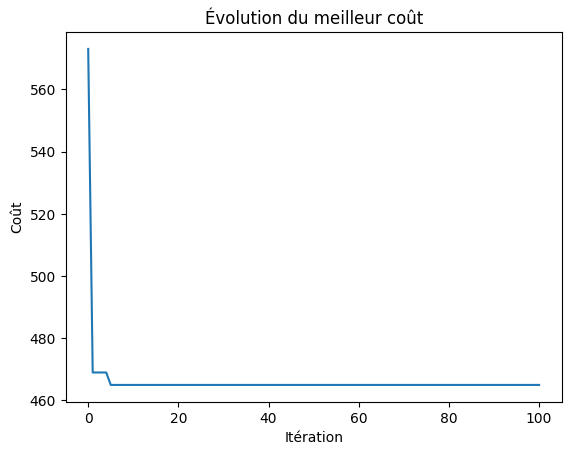


Meilleur chemin trouvé :
Départ: [1, 3, 6]...[2, 8, 1]
Longueur du chemin: 11 villes
Coût total: 465
Chargement du fichier ../data/matrice_routes_ordre_20.csv...

Paramètres du problème:
- Nombre de villes: 20
- Points de collecte: [5, 13]
- Taille de la matrice: (20, 20)
Iter 0: Best=862, Avg=1093.8
Iter 10: Best=808, Avg=969.2
Iter 20: Best=808, Avg=946.9
Iter 30: Best=808, Avg=970.5
Iter 40: Best=808, Avg=935.3
Iter 50: Best=808, Avg=945.4
Iter 60: Best=808, Avg=951.3
Iter 70: Best=808, Avg=961.0
Iter 80: Best=808, Avg=931.3
Iter 90: Best=808, Avg=933.5

Optimisation terminée en 3.59s
Meilleur coût trouvé: 808
Solution valide: True


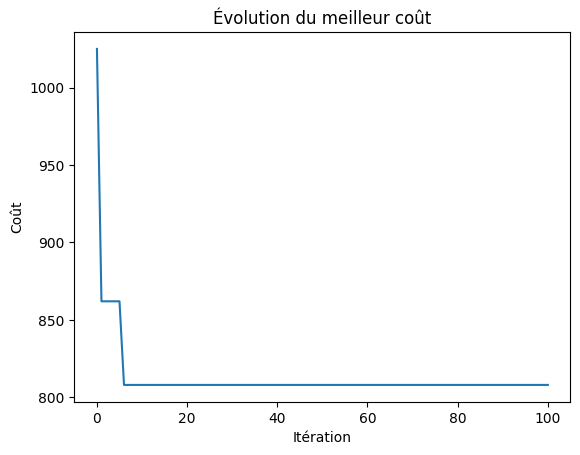


Meilleur chemin trouvé :
Départ: [1, 13, 5]...[3, 16, 1]
Longueur du chemin: 21 villes
Coût total: 808
Chargement du fichier ../data/matrice_routes_ordre_30.csv...

Paramètres du problème:
- Nombre de villes: 30
- Points de collecte: [5, 14]
- Taille de la matrice: (30, 30)
Iter 0: Best=858, Avg=1121.3
Iter 10: Best=659, Avg=1042.7
Iter 20: Best=659, Avg=1056.4
Iter 30: Best=659, Avg=1053.4
Iter 40: Best=659, Avg=1059.0
Iter 50: Best=659, Avg=1058.6
Iter 60: Best=659, Avg=1051.4
Iter 70: Best=659, Avg=1056.0
Iter 80: Best=659, Avg=1056.0
Iter 90: Best=659, Avg=1055.1

Optimisation terminée en 7.13s
Meilleur coût trouvé: 659
Solution valide: True


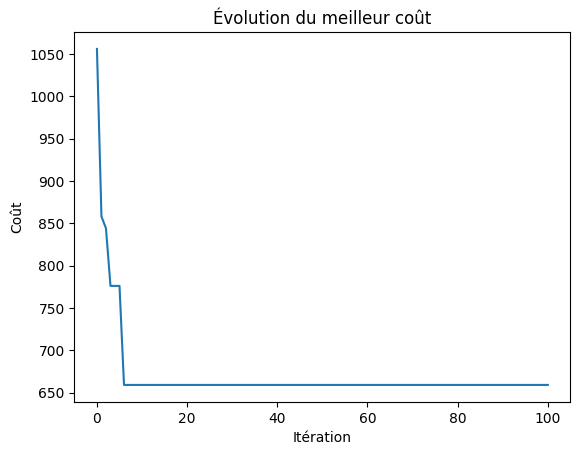


Meilleur chemin trouvé :
Départ: [1, 5, 23]...[8, 26, 1]
Longueur du chemin: 31 villes
Coût total: 659
Chargement du fichier ../data/matrice_routes_ordre_40_Difficile.csv...

Paramètres du problème:
- Nombre de villes: 40
- Points de collecte: [37, 19]
- Taille de la matrice: (40, 40)
Iter 0: Best=628, Avg=927.8
Iter 10: Best=525, Avg=713.6
Iter 20: Best=525, Avg=692.5
Iter 30: Best=508, Avg=669.5
Iter 40: Best=508, Avg=643.6
Iter 50: Best=508, Avg=657.9
Iter 60: Best=508, Avg=672.6
Iter 70: Best=508, Avg=662.7
Iter 80: Best=471, Avg=658.8
Iter 90: Best=471, Avg=662.6

Optimisation terminée en 11.22s
Meilleur coût trouvé: 471
Solution valide: True


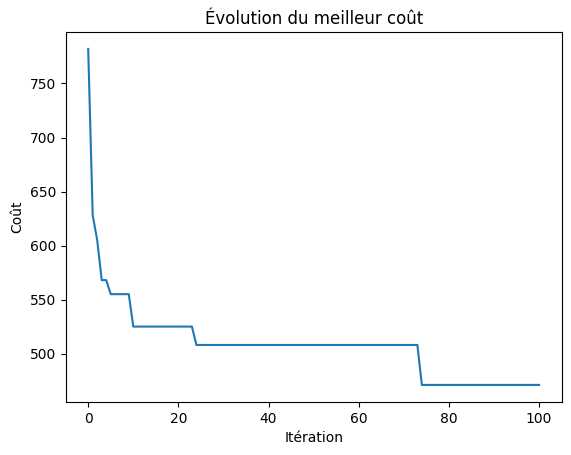


Meilleur chemin trouvé :
Départ: [1, 37, 40]...[20, 32, 1]
Longueur du chemin: 41 villes
Coût total: 471
Chargement du fichier ../data/matrice_routes_ordre_50.csv...

Paramètres du problème:
- Nombre de villes: 50
- Points de collecte: [34, 9]
- Taille de la matrice: (50, 50)
Iter 0: Best=851, Avg=1111.0
Iter 10: Best=721, Avg=914.7
Iter 20: Best=701, Avg=796.9
Iter 30: Best=675, Avg=803.4
Iter 40: Best=675, Avg=789.3
Iter 50: Best=675, Avg=786.8
Iter 60: Best=675, Avg=775.6
Iter 70: Best=675, Avg=809.9
Iter 80: Best=656, Avg=785.3
Iter 90: Best=656, Avg=791.9

Optimisation terminée en 16.81s
Meilleur coût trouvé: 656
Solution valide: True


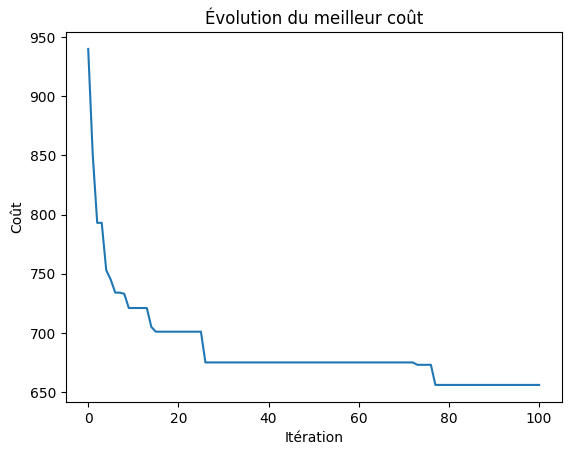


Meilleur chemin trouvé :
Départ: [1, 34, 29]...[14, 49, 1]
Longueur du chemin: 51 villes
Coût total: 656
Chargement du fichier ../data/matrice_routes_ordre_75.csv...

Paramètres du problème:
- Nombre de villes: 75
- Points de collecte: [25, 37]
- Taille de la matrice: (75, 75)
Iter 0: Best=1034, Avg=1323.2
Iter 10: Best=852, Avg=1171.3
Iter 20: Best=848, Avg=1106.4
Iter 30: Best=848, Avg=1114.8
Iter 40: Best=815, Avg=1116.3
Iter 50: Best=815, Avg=1119.5
Iter 60: Best=815, Avg=1114.5
Iter 70: Best=815, Avg=1108.5
Iter 80: Best=809, Avg=1101.2
Iter 90: Best=787, Avg=1059.0

Optimisation terminée en 34.60s
Meilleur coût trouvé: 787
Solution valide: True


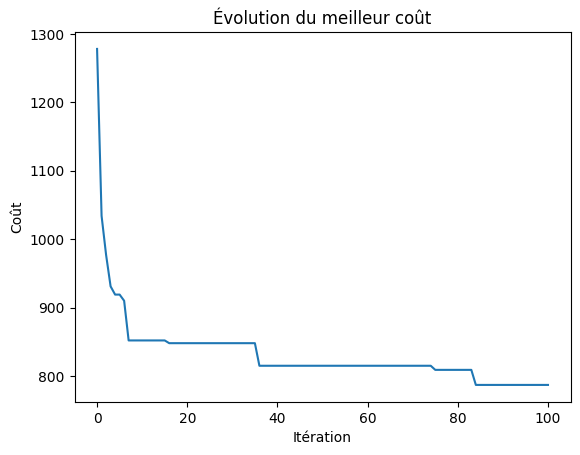


Meilleur chemin trouvé :
Départ: [1, 25, 28]...[38, 22, 1]
Longueur du chemin: 76 villes
Coût total: 787
Chargement du fichier ../data/matrice_routes_ordre_100.csv...

Paramètres du problème:
- Nombre de villes: 100
- Points de collecte: [46, 13]
- Taille de la matrice: (100, 100)
Iter 0: Best=1087, Avg=1374.5
Iter 10: Best=778, Avg=1139.5
Iter 20: Best=778, Avg=1075.2
Iter 30: Best=735, Avg=1094.4
Iter 40: Best=706, Avg=1076.1
Iter 50: Best=706, Avg=1061.2
Iter 60: Best=705, Avg=1069.6
Iter 70: Best=705, Avg=1083.6
Iter 80: Best=705, Avg=1027.2
Iter 90: Best=705, Avg=1096.9

Optimisation terminée en 61.02s
Meilleur coût trouvé: 705
Solution valide: True


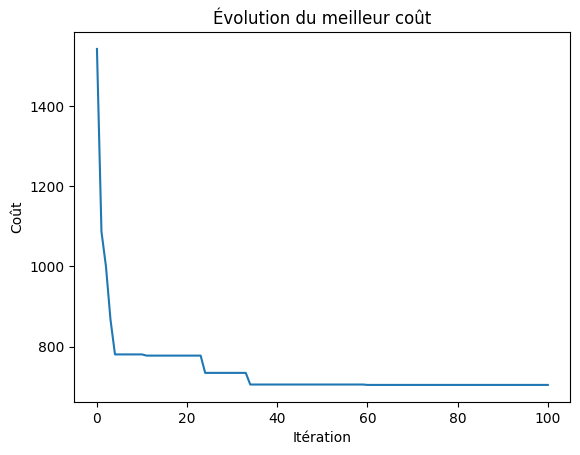


Meilleur chemin trouvé :
Départ: [1, 46, 95]...[17, 64, 1]
Longueur du chemin: 101 villes
Coût total: 705
Chargement du fichier ../data/matrice_routes_ordre_generation_aleatoire.csv...

Paramètres du problème:
- Nombre de villes: 100
- Points de collecte: [96, 56]
- Taille de la matrice: (100, 100)
Iter 0: Best=1267, Avg=1635.9
Iter 10: Best=1042, Avg=1348.6
Iter 20: Best=1036, Avg=1391.7
Iter 30: Best=981, Avg=1328.1
Iter 40: Best=974, Avg=1333.9
Iter 50: Best=967, Avg=1370.6
Iter 60: Best=967, Avg=1357.8
Iter 70: Best=967, Avg=1393.0
Iter 80: Best=967, Avg=1388.8
Iter 90: Best=967, Avg=1437.4

Optimisation terminée en 59.59s
Meilleur coût trouvé: 960
Solution valide: True


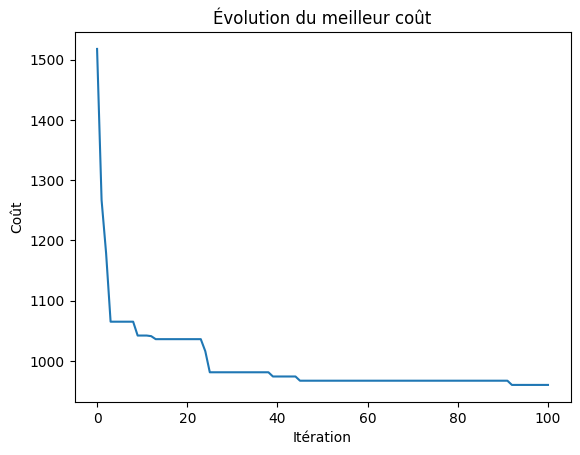


Meilleur chemin trouvé :
Départ: [1, 96, 56]...[61, 66, 1]
Longueur du chemin: 101 villes
Coût total: 960


In [ ]:
if __name__ == "__main__":
    try:
        liste = ["../data/matrice_routes_ordre_10.csv",
                 "../data/matrice_routes_ordre_20.csv",
                 "../data/matrice_routes_ordre_30.csv",
                 "../data/matrice_routes_ordre_40_Difficile.csv",
                 "../data/matrice_routes_ordre_50.csv",
                 "../data/matrice_routes_ordre_75.csv",
                 "../data/matrice_routes_ordre_100.csv",
                 "../data/matrice_routes_ordre_generation_aleatoire.csv"
                 ]
        for i in range(len(liste)):
            file_path = liste[i]  # Remplace ce chemin si nécessaire
            print(f"Chargement du fichier {file_path}...")
            matrix, collecte = load_adjacency_matrix_and_collecte(file_path)
            
            print("\nParamètres du problème:")
            print(f"- Nombre de villes: {len(matrix)}")
            print(f"- Points de collecte: {collecte}")
            print(f"- Taille de la matrice: {matrix.shape}")
            
            # Instanciation et résolution
            solver = ACO_TSP(matrix, collecte)
            solution, cost = solver.solve(
                num_ants=50,
                iterations=100,
                alpha=1.0,
                beta=3.0,
                evaporation_rate=0.4,
                Q=100.0
            )
            
            print("\nMeilleur chemin trouvé :")
            solution_int = [int(city) for city in solution]
            print(f"Départ: {solution_int[:3]}...{solution_int[-3:]}")
            print(f"Longueur du chemin: {len(solution)} villes")
            print(f"Coût total: {cost}")
        
    except Exception as e:
        print(f" Erreur: {str(e)}") 


# Notebook : MetaHeuristiques/Notebook_resolution_genetique.ipynb

# Algorithme Génétique

## Principe Général

Un **algorithme génétique** est une méthode d’optimisation inspirée du processus de l’évolution naturelle. Il repose sur trois grands principes : **variation**, **adaptation** et **hérédité**.

Chaque **individu** représente une solution possible au problème (par exemple, un trajet dans le cas du problème du voyageur de commerce), codé sous forme de **chromosome** (liste de villes).

---

## Termes Clés

- **Individu** : un trajet possible  
- **Population** : un ensemble de trajets  
- **Mutation** : modification aléatoire d’un trajet  
- **Adaptation** : plus le trajet est court, plus il est adapté  
- **Sélection naturelle** : les moins adaptés sont éliminés

---

## Fonctionnement Étape par Étape

### 1. Initialisation de la Population
Création aléatoire d’une population d’individus. Cette diversité initiale est essentielle pour explorer efficacement l’espace des solutions.

### 2. Évaluation de l’Aptitude (*Fitness*)
Chaque individu est évalué selon une **fonction d’aptitude**, qui mesure la qualité de la solution (ex: distance totale du trajet).

### 3. Sélection
Les meilleurs individus sont choisis pour se reproduire.  
Méthodes courantes : **roulette**, **tournoi**, etc.  
Objectif : favoriser les bons candidats, tout en conservant une certaine diversité.

### 4. Croisement (*Crossover*)
Des couples d’individus sélectionnés produisent des **descendants** en combinant leurs chromosomes. Cela permet de créer de nouvelles solutions à partir des meilleures existantes.

### 5. Mutation
Des modifications aléatoires sont appliquées pour introduire de la nouveauté et éviter la stagnation. Cela permet de maintenir la diversité génétique.

### 6. Remplacement
Les nouveaux individus remplacent partiellement ou totalement la population précédente selon une stratégie choisie (ex: **élitisme**).

### 7. Itération
Les étapes sont répétées jusqu’à atteindre un critère d’arrêt :  
nombre de générations, seuil de qualité atteint, etc.

---

## Résumé Visuel du Cycle



In [ ]:
import random
import numpy as np
from typing import List, Tuple, Set
import time
import matplotlib.pyplot as plt

In [ ]:
def load_adjacency_matrix_and_collecte(file_path: str) -> Tuple[np.ndarray, List[int]]:
    """Charge la matrice d'adjacence et les points de collecte depuis un fichier CSV."""
    try:
        with open(file_path, 'r') as f:
            lines = [line.strip() for line in f if line.strip()]
        
        # Dernière ligne contient les points de collecte
        points_collecte = list(map(int, lines[-1].split(';')))
        
        # Matrice d'adjacence dans les autres lignes
        matrix = []
        for line in lines[:-1]:
            row = list(map(int, line.split(';')))
            matrix.append(row)
            
        return np.array(matrix), points_collecte
        
    except FileNotFoundError:
        raise ValueError(f"Fichier {file_path} introuvable")
    except Exception as e:
        raise ValueError(f"Erreur lors de la lecture du fichier: {str(e)}")

## 1. Initialisation et Validation
 La classe GeneticTSP résout un problème de tournée avec contraintes spécifiques :
 - Doit commencer et finir à un point donné
 - Doit passer par certains points de collecte
 - Doit visiter toutes les villes exactement une fois

In [ ]:
class GeneticTSP:
    def __init__(self, matrix: np.ndarray, collecte_points: List[int], start_node: int = 1):
        self.matrix = matrix
        self.collecte = set(collecte_points)
        self.start_node = start_node
        self.num_cities = len(matrix)
        self.best_solution = None
        self.best_cost = float('inf')
        self.cost_history = []
        
        # Pré-calcul des villes accessibles depuis chaque ville
        self.accessible_from = {
            i: [j for j in range(1, self.num_cities+1) if matrix[i-1][j-1] != -1]
            for i in range(1, self.num_cities+1)
        }
        
        # Validation des entrées
        self._validate_inputs()
    
    def _validate_inputs(self):
        if len(self.matrix.shape) != 2 or self.matrix.shape[0] != self.matrix.shape[1]:
            raise ValueError("La matrice d'adjacence doit être carrée")
        if self.start_node < 1 or self.start_node > self.num_cities:
            raise ValueError(f"Le noeud de départ doit être entre 1 et {self.num_cities}")
        if not self.collecte:
            raise ValueError("Aucun point de collecte spécifié")

    def is_valid_path(self, path: List[int]) -> bool:
        """Vérifie si un chemin satisfait toutes les contraintes."""
        # Vérification basique
        if (len(path) != self.num_cities + 1 or 
            path[0] != self.start_node or 
            path[-1] != self.start_node):
            return False
            
        # Points de collecte
        if path[1] not in self.collecte or path[-2] in self.collecte:
            return False
            
        # Toutes villes visitées exactement une fois (sauf départ/arrivée)
        if len(set(path)) != self.num_cities:
            return False
            
        # Chemins valides
        for i in range(len(path)-1):
            if self.matrix[path[i]-1][path[i+1]-1] == -1:
                return False
                
        return True

    def calculate_cost(self, path: List[int]) -> int:
        """Calcule le coût total d'un chemin."""
        return sum(self.matrix[path[i]-1][path[i+1]-1] for i in range(len(path)-1))

    def _greedy_construction(self) -> List[int]:
        """Construit une solution initiale avec une approche gloutonne en respectant les contraintes."""
        path = [self.start_node]
        unvisited = set(range(1, self.num_cities+1)) - {self.start_node}
        
        # Premier mouvement vers le point de collecte le plus proche
        collect_candidates = [c for c in self.collecte if c in unvisited and 
                            self.matrix[self.start_node-1][c-1] != -1]
        if not collect_candidates:
            return None
            
        nearest_collect = min(collect_candidates, 
                            key=lambda x: self.matrix[self.start_node-1][x-1])
        path.append(nearest_collect)
        unvisited.remove(nearest_collect)
        
        # Construction gloutonne du chemin
        while unvisited:
            last = path[-1]
            
            # Filtrer les villes accessibles non visitées
            candidates = [c for c in self.accessible_from[last] if c in unvisited]
            
            if not candidates:
                # Si aucun candidat valide, essayer de trouver un chemin valide
                candidates = list(unvisited)
                random.shuffle(candidates)
                
            # Sélectionner la ville la plus proche accessible
            next_city = None
            min_dist = float('inf')
            for c in candidates:
                if self.matrix[last-1][c-1] < min_dist and self.matrix[last-1][c-1] != -1:
                    min_dist = self.matrix[last-1][c-1]
                    next_city = c
            
            if next_city is None:
                return None
                
            path.append(next_city)
            unvisited.remove(next_city)
        
        # Retour au point de départ
        if self.matrix[path[-1]-1][self.start_node-1] == -1:
            return None
            
        path.append(self.start_node)
        
        return path if self.is_valid_path(path) else None

    def generate_initial_population(self, size: int) -> List[List[int]]:
        """Génère une population initiale diversifiée."""
        population = []
        
        # 1. Solutions gloutonnes variées
        for _ in range(size//2):
            sol = self._greedy_construction()
            if sol:
                population.append(sol)
        
        # 2. Solutions semi-aléatoires avec contraintes respectées
        while len(population) < size:
            path = [self.start_node]
            unvisited = set(range(1, self.num_cities+1)) - {self.start_node}
            
            # Ajout d'un point de collecte en deuxième position
            collect_candidates = [c for c in self.collecte if c in unvisited and 
                                self.matrix[self.start_node-1][c-1] != -1]
            if not collect_candidates:
                break
                
            collect_point = random.choice(collect_candidates)
            path.append(collect_point)
            unvisited.remove(collect_point)
            
            # Construction aléatoire mais valide du chemin
            while unvisited:
                last = path[-1]
                candidates = [c for c in self.accessible_from[last] if c in unvisited]
                
                if not candidates:
                    break
                    
                next_city = random.choice(candidates)
                path.append(next_city)
                unvisited.remove(next_city)
            
            # Retour au départ si possible
            if unvisited or self.matrix[path[-1]-1][self.start_node-1] == -1:
                continue
                
            path.append(self.start_node)
            
            if self.is_valid_path(path):
                population.append(path)
        
        return population[:size]

    def tournament_selection(self, population: List[List[int]], tournament_size: int = 5) -> List[List[int]]:
        """Sélection par tournoi."""
        selected = []
        for _ in range(len(population)):
            participants = random.sample(population, min(tournament_size, len(population)))
            winner = min(participants, key=lambda x: self.calculate_cost(x))
            selected.append(winner)
        return selected

    def ordered_crossover(self, parent1: List[int], parent2: List[int]) -> List[int]:
        """Croisement ordonné pour préserver les permutations valides."""
        size = len(parent1)
        start, end = sorted(random.sample(range(1, size-1), 2))
        
        def create_child(p1, p2):
            child = [None]*size
            child[0] = child[-1] = self.start_node
            
            # Copier le segment entre start et end
            child[start:end] = p1[start:end]
            
            # Remplir avec les villes de p2 dans l'ordre
            remaining = [city for city in p2 if city not in child[start:end]]
            ptr = 1
            for i in range(1, size-1):
                if child[i] is None:
                    child[i] = remaining[ptr-1]
                    ptr += 1
            return child
        
        child1 = create_child(parent1, parent2)
        child2 = create_child(parent2, parent1)
        
        # Validation des enfants
        valid_child1 = child1 if self.is_valid_path(child1) else parent1
        valid_child2 = child2 if self.is_valid_path(child2) else parent2
        
        return valid_child1, valid_child2

    def mutate(self, path: List[int], mutation_rate: float = 0.1) -> List[int]:
        """Mutation par échange de deux villes."""
        if random.random() > mutation_rate or len(path) <= 3:
            return path
            
        # On ne mute pas le départ, l'arrivée ou les points de collecte contraints
        mutable_positions = list(range(1, len(path)-1))
        if len(path) > 3:
            mutable_positions.remove(1)  # Ne pas muter le premier point de collecte
        if len(path) > 4:
            mutable_positions.remove(len(path)-2)  # Ne pas muter l'avant-dernier point
            
        if len(mutable_positions) < 2:
            return path
            
        i, j = random.sample(mutable_positions, 2)
        new_path = path.copy()
        new_path[i], new_path[j] = new_path[j], new_path[i]
        
        return new_path if self.is_valid_path(new_path) else path

    def solve(self, population_size: int = 100, generations: int = 200, 
             mutation_rate: float = 0.15, elite_size: int = 10):
        """Algorithme génétique principal."""
        start_time = time.time()
        
        # Initialisation
        population = self.generate_initial_population(population_size)
        if not population:
            raise ValueError("Impossible de générer une population initiale valide. " +
                           "Vérifiez les contraintes et la matrice d'adjacence.")
            
        population.sort(key=lambda x: self.calculate_cost(x))
        self.best_solution = population[0]
        self.best_cost = self.calculate_cost(population[0])
        self.cost_history.append(self.best_cost)
        
        # Évolution
        for gen in range(generations):
            # Sélection élitiste
            elites = population[:elite_size]
            
            # Sélection
            selected = self.tournament_selection(population)
            
            # Croisement
            offspring = []
            for i in range(0, len(selected)-1, 2):
                child1, child2 = self.ordered_crossover(selected[i], selected[i+1])
                offspring.append(child1)
                offspring.append(child2)
            
            # Mutation
            mutated = [self.mutate(child, mutation_rate) for child in offspring]
            
            # Nouvelle population
            population = elites + mutated
            population.sort(key=lambda x: self.calculate_cost(x))
            population = population[:population_size]
            
            # Mise à jour meilleure solution
            current_best = population[0]
            current_cost = self.calculate_cost(current_best)
            if current_cost < self.best_cost:
                self.best_solution = current_best
                self.best_cost = current_cost
            self.cost_history.append(self.best_cost)
            
            # Affichage progression
            if gen % 10 == 0:
                avg_cost = np.mean([self.calculate_cost(p) for p in population])
                print(f"Gen {gen}: Best={self.best_cost} Avg={avg_cost:.1f}")
        
        print(f"\nOptimisation terminée en {time.time()-start_time:.2f}s")
        print(f"Meilleur coût trouvé: {self.best_cost}")
        print(f"Solution valide: {self.is_valid_path(self.best_solution)}")
        
        # Visualisation
        plt.plot(self.cost_history)
        plt.title("Évolution du meilleur coût")
        plt.xlabel("Génération")
        plt.ylabel("Coût")
        plt.show()
        
        return self.best_solution, self.best_cost

## 2. Vérification et Calcul des Solutions
### Contrôle de validité d'un chemin
Un chemin valide doit :
1. Commencer et finir au point de départ
2. Passer par un point de collecte en 2ème position
3. Visiter toutes les villes exactement une fois
4. Ne contenir que des connexions valides (pas de -1 dans la matrice)

In [ ]:
    def is_valid_path(self, path: List[int]) -> bool:
        if (len(path) != self.num_cities + 1 or 
            path[0] != self.start_node or 
            path[-1] != self.start_node):
            return False
            
        if path[1] not in self.collecte or path[-2] in self.collecte:
            return False
            
        if len(set(path)) != self.num_cities:
            return False
            
        for i in range(len(path)-1):
            if self.matrix[path[i]-1][path[i+1]-1] == -1:
                return False
        return True

    def calculate_cost(self, path: List[int]) -> int:
        return sum(self.matrix[path[i]-1][path[i+1]-1] for i in range(len(path)-1))

## 3. Construction des Solutions Initiales
Stratégie hybride pour la population initiale :
- 50% de solutions gloutonnes (optimisées localement)
- 50% de solutions aléatoires (diversité)

## 4. Opérateurs Génétiques
### Sélection par Tournoi
- Sélectionne les meilleurs individus par compétition
- Maintient la pression de sélection

### Croisement Ordonné (OX)
- Préserve l'ordre des villes
- Garantit des solutions valides
- Combine des segments de parents

### Mutation Contrôlée
- Échange deux villes aléatoirement
- Préserve les contraintes de collecte
- Taux de mutation paramétrable

## 5. Algorithme Principal
### Processus Évolutif
1. Initialisation de la population
2. Sélection des parents
3. Croisement et mutation
4. Élitisme (conservation des meilleurs solutions)
5. Convergence vers une solution optimale

## Choix des paramètres pour l'heuristique d'Algorithme Génétique (GA)

Afin d'optimiser la résolution du problème pour différentes tailles de villes, les paramètres suivants sont choisis :

| Taille (nombre de villes) | Taille de la population (`population_size`) | Nombre de générations (`n_generations`) | Taux de croisement (`crossover_rate`) | Taux de mutation (`mutation_rate`) | Sélection |
|:---|:---|:---|:---|:---|:---|
| 10 | 20 | 50 | 0.9 | 0.2 | Tournoi |
| 20 | 40 | 100 | 0.9 | 0.2 | Tournoi |
| 30 | 60 | 150 | 0.9 | 0.15 | Tournoi |
| 40 | 80 | 200 | 0.9 | 0.15 | Tournoi |
| 50 | 100 | 250 | 0.9 | 0.1 | Tournoi |
| 75 | 150 | 400 | 0.9 | 0.1 | Tournoi |
| 100 | 200 | 500 | 0.9 | 0.05 | Tournoi |

### Explication des choix

- **Taille de la population (`population_size`)** : proportionnelle au nombre de villes pour garantir une diversité génétique suffisante.
- **Nombre de générations (`n_generations`)** : augmente avec la taille du problème pour permettre la convergence vers de meilleures solutions.
- **Taux de croisement (`crossover_rate`)** : fixé à 0.9 pour assurer un fort échange génétique entre les solutions.
- **Taux de mutation (`mutation_rate`)** : légèrement plus faible pour les grandes instances pour éviter de casser les solutions prometteuses.
- **Méthode de sélection** : **Tournoi** (Tournament selection) pour favoriser les solutions robustes tout en conservant de la diversité.

### Recommandations supplémentaires

- **Élitisme** : Toujours conserver les meilleures solutions d'une génération à l'autre pour assurer la non-régression.
- **Mutation adaptative** : Diminuer légèrement le taux de mutation au fur et à mesure des générations pour stabiliser la recherche.
- **Croisement spécifique TSP** : Utiliser des opérateurs de croisement adaptés au problème de tournée comme **Order Crossover (OX)** ou **Partially Mapped Crossover (PMX)**.


## Paramètres :

- population_size : Augmente la diversité mais nécessite plus de calculs
- generations : Plus le nombre de générations est élevé, plus l'algorithme peux trouver de meilleures solution
- mutation_rate : Evite la stagnation dans les optima locaux
- elite_size : Nombre d'individus les mieux classés pour la génération suivante. Garantit que les meilleures solution ne sont pas perdues

Chargement du fichier ../data/matrice_routes_ordre_10.csv...

Paramètres du problème:
- Nombre de villes: 10
- Points de collecte: [3, 7]
- Taille de la matrice: (10, 10)
Gen 0: Best=554 Avg=738.1
Gen 10: Best=487 Avg=489.1
Gen 20: Best=487 Avg=494.2
Gen 30: Best=487 Avg=489.4
Gen 40: Best=487 Avg=496.4
Gen 50: Best=487 Avg=487.7
Gen 60: Best=487 Avg=491.2
Gen 70: Best=487 Avg=498.7
Gen 80: Best=487 Avg=494.9
Gen 90: Best=487 Avg=507.1
Gen 100: Best=487 Avg=495.1
Gen 110: Best=487 Avg=492.0
Gen 120: Best=487 Avg=495.6
Gen 130: Best=487 Avg=487.0
Gen 140: Best=487 Avg=492.7
Gen 150: Best=487 Avg=489.3
Gen 160: Best=487 Avg=502.5
Gen 170: Best=487 Avg=490.3
Gen 180: Best=487 Avg=496.5
Gen 190: Best=487 Avg=490.2

Optimisation terminée en 0.59s
Meilleur coût trouvé: 487
Solution valide: True


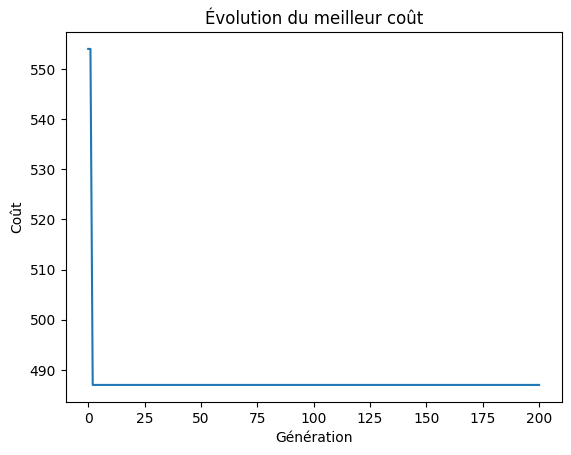


Meilleur chemin trouvé (extrait):
Départ: [1, 7, 10]...[2, 8, 1]
Longueur: 11 villes
Coût total: 487
Chargement du fichier ../data/matrice_routes_ordre_20.csv...

Paramètres du problème:
- Nombre de villes: 20
- Points de collecte: [5, 13]
- Taille de la matrice: (20, 20)
Gen 0: Best=1025 Avg=1025.0
Gen 10: Best=1016 Avg=1016.0
Gen 20: Best=1016 Avg=1016.0
Gen 30: Best=1016 Avg=1017.6
Gen 40: Best=1016 Avg=1016.0
Gen 50: Best=1016 Avg=1016.0
Gen 60: Best=1016 Avg=1016.0
Gen 70: Best=1016 Avg=1016.0
Gen 80: Best=1016 Avg=1016.0
Gen 90: Best=1016 Avg=1016.0
Gen 100: Best=1016 Avg=1016.0
Gen 110: Best=1016 Avg=1016.0
Gen 120: Best=1016 Avg=1016.0
Gen 130: Best=1016 Avg=1016.0
Gen 140: Best=1016 Avg=1016.0
Gen 150: Best=1016 Avg=1016.0
Gen 160: Best=1016 Avg=1016.0
Gen 170: Best=1016 Avg=1016.0
Gen 180: Best=1016 Avg=1016.0
Gen 190: Best=1016 Avg=1016.0

Optimisation terminée en 0.96s
Meilleur coût trouvé: 1016
Solution valide: True


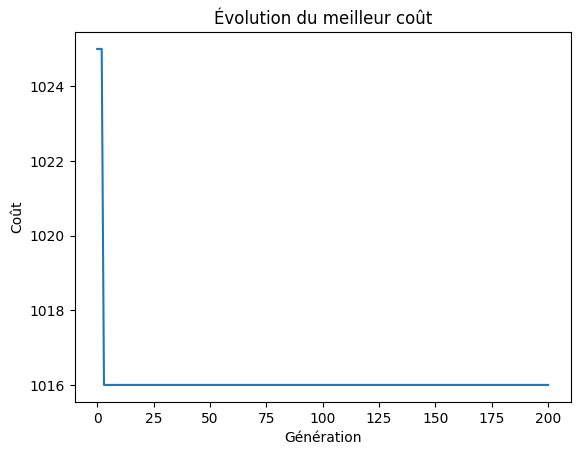


Meilleur chemin trouvé (extrait):
Départ: [1, 13, 5]...[10, 7, 1]
Longueur: 21 villes
Coût total: 1016
Chargement du fichier ../data/matrice_routes_ordre_30.csv...

Paramètres du problème:
- Nombre de villes: 30
- Points de collecte: [5, 14]
- Taille de la matrice: (30, 30)
Gen 0: Best=1056 Avg=1071.5
Gen 10: Best=1008 Avg=1008.0
Gen 20: Best=1008 Avg=1008.0
Gen 30: Best=1008 Avg=1008.0
Gen 40: Best=1008 Avg=1008.0
Gen 50: Best=1008 Avg=1015.2
Gen 60: Best=1008 Avg=1008.8
Gen 70: Best=1008 Avg=1008.0
Gen 80: Best=1008 Avg=1008.0
Gen 90: Best=1008 Avg=1008.0
Gen 100: Best=1008 Avg=1008.0
Gen 110: Best=1008 Avg=1010.3
Gen 120: Best=1008 Avg=1011.2
Gen 130: Best=1008 Avg=1008.0
Gen 140: Best=1008 Avg=1008.0
Gen 150: Best=1008 Avg=1008.0
Gen 160: Best=1008 Avg=1008.0
Gen 170: Best=1008 Avg=1015.0
Gen 180: Best=1008 Avg=1016.8
Gen 190: Best=1008 Avg=1008.0

Optimisation terminée en 1.35s
Meilleur coût trouvé: 1008
Solution valide: True


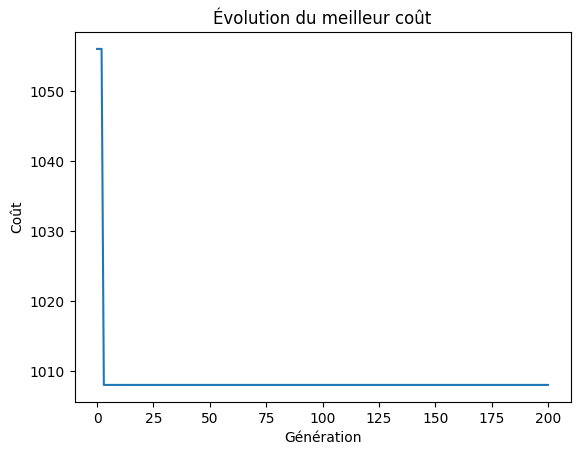


Meilleur chemin trouvé (extrait):
Départ: [1, 5, 9]...[7, 12, 1]
Longueur: 31 villes
Coût total: 1008
Chargement du fichier ../data/matrice_routes_ordre_40_Difficile.csv...

Paramètres du problème:
- Nombre de villes: 40
- Points de collecte: [37, 19]
- Taille de la matrice: (40, 40)
Gen 0: Best=782 Avg=782.0
Gen 10: Best=782 Avg=782.0
Gen 20: Best=782 Avg=782.0
Gen 30: Best=782 Avg=782.0
Gen 40: Best=782 Avg=782.0
Gen 50: Best=782 Avg=782.0
Gen 60: Best=782 Avg=782.0
Gen 70: Best=782 Avg=782.0
Gen 80: Best=782 Avg=784.7
Gen 90: Best=782 Avg=782.0
Gen 100: Best=782 Avg=782.0
Gen 110: Best=782 Avg=782.0
Gen 120: Best=782 Avg=783.3
Gen 130: Best=782 Avg=782.0
Gen 140: Best=782 Avg=782.0
Gen 150: Best=782 Avg=782.0
Gen 160: Best=782 Avg=782.0
Gen 170: Best=782 Avg=782.0
Gen 180: Best=782 Avg=782.0
Gen 190: Best=782 Avg=782.0

Optimisation terminée en 1.70s
Meilleur coût trouvé: 782
Solution valide: True


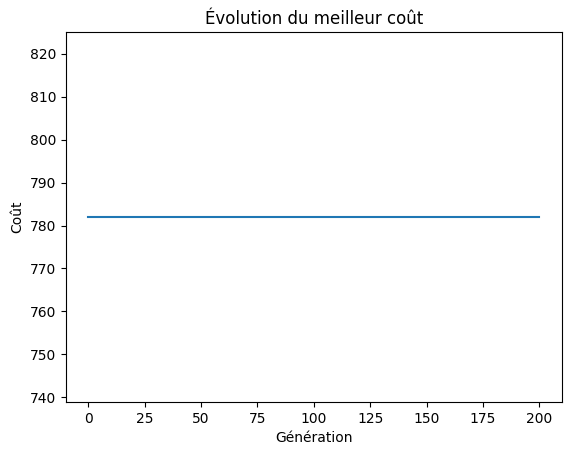


Meilleur chemin trouvé (extrait):
Départ: [1, 37, 40]...[30, 6, 1]
Longueur: 41 villes
Coût total: 782
Chargement du fichier ../data/matrice_routes_ordre_50.csv...

Paramètres du problème:
- Nombre de villes: 50
- Points de collecte: [34, 9]
- Taille de la matrice: (50, 50)
Gen 0: Best=3914 Avg=4341.1
Gen 10: Best=3374 Avg=3544.1
Gen 20: Best=2909 Avg=2973.7
Gen 30: Best=2752 Avg=2890.6
Gen 40: Best=2615 Avg=2656.3
Gen 50: Best=2339 Avg=2356.5
Gen 60: Best=2239 Avg=2239.0
Gen 70: Best=2192 Avg=2197.9
Gen 80: Best=2049 Avg=2049.0
Gen 90: Best=2001 Avg=2034.1
Gen 100: Best=1874 Avg=1887.3
Gen 110: Best=1811 Avg=1813.6
Gen 120: Best=1712 Avg=1808.2
Gen 130: Best=1655 Avg=1655.2
Gen 140: Best=1574 Avg=1574.0
Gen 150: Best=1542 Avg=1543.1
Gen 160: Best=1542 Avg=1542.0
Gen 170: Best=1525 Avg=1526.4
Gen 180: Best=1525 Avg=1525.0
Gen 190: Best=1525 Avg=1526.1

Optimisation terminée en 2.14s
Meilleur coût trouvé: 1525
Solution valide: True


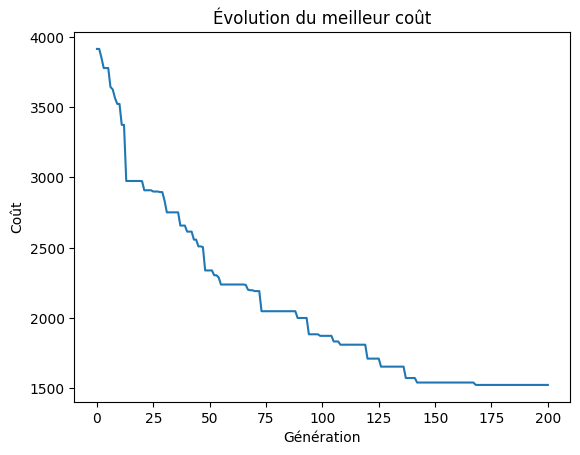


Meilleur chemin trouvé (extrait):
Départ: [1, 9, 41]...[5, 49, 1]
Longueur: 51 villes
Coût total: 1525
Chargement du fichier ../data/matrice_routes_ordre_75.csv...

Paramètres du problème:
- Nombre de villes: 75
- Points de collecte: [25, 37]
- Taille de la matrice: (75, 75)
Gen 0: Best=6329 Avg=6872.2
Gen 10: Best=5517 Avg=5666.9
Gen 20: Best=5066 Avg=5150.4
Gen 30: Best=4498 Avg=4518.8
Gen 40: Best=4203 Avg=4203.0
Gen 50: Best=4109 Avg=4111.2
Gen 60: Best=3914 Avg=3984.7
Gen 70: Best=3582 Avg=3639.5
Gen 80: Best=3431 Avg=3431.0
Gen 90: Best=3420 Avg=3427.1
Gen 100: Best=3164 Avg=3179.1
Gen 110: Best=2991 Avg=3059.6
Gen 120: Best=2951 Avg=2951.0
Gen 130: Best=2921 Avg=2921.0
Gen 140: Best=2893 Avg=2895.0
Gen 150: Best=2872 Avg=2872.0
Gen 160: Best=2872 Avg=2872.0
Gen 170: Best=2833 Avg=2868.1
Gen 180: Best=2775 Avg=2775.0
Gen 190: Best=2775 Avg=2778.9

Optimisation terminée en 3.16s
Meilleur coût trouvé: 2775
Solution valide: True


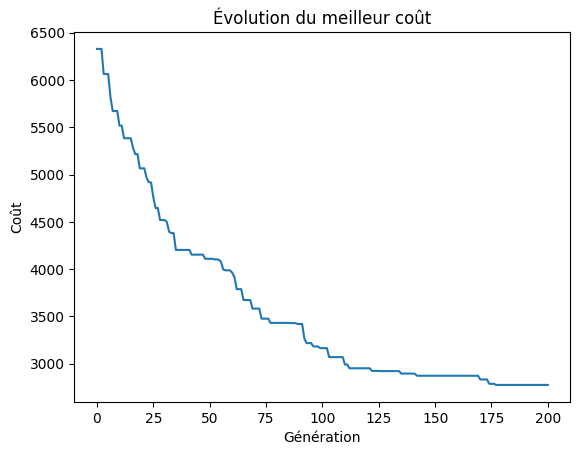


Meilleur chemin trouvé (extrait):
Départ: [1, 25, 46]...[73, 29, 1]
Longueur: 76 villes
Coût total: 2775
Chargement du fichier ../data/matrice_routes_ordre_100.csv...

Paramètres du problème:
- Nombre de villes: 100
- Points de collecte: [46, 13]
- Taille de la matrice: (100, 100)
Gen 0: Best=8151 Avg=9223.1
Gen 10: Best=7727 Avg=7824.1
Gen 20: Best=7156 Avg=7320.2
Gen 30: Best=6707 Avg=6839.8
Gen 40: Best=6157 Avg=6351.8
Gen 50: Best=5826 Avg=5988.8
Gen 60: Best=5490 Avg=5569.2
Gen 70: Best=5307 Avg=5442.1
Gen 80: Best=4867 Avg=4986.7
Gen 90: Best=4711 Avg=4711.0
Gen 100: Best=4644 Avg=4679.6
Gen 110: Best=4454 Avg=4454.0
Gen 120: Best=4195 Avg=4314.3
Gen 130: Best=4037 Avg=4082.9
Gen 140: Best=3904 Avg=3910.7
Gen 150: Best=3788 Avg=3793.1
Gen 160: Best=3738 Avg=3795.3
Gen 170: Best=3738 Avg=3738.0
Gen 180: Best=3397 Avg=3500.0
Gen 190: Best=3299 Avg=3301.1

Optimisation terminée en 4.33s
Meilleur coût trouvé: 3237
Solution valide: True


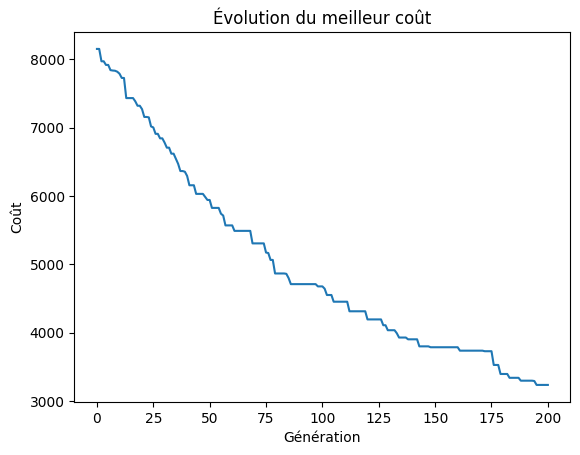


Meilleur chemin trouvé (extrait):
Départ: [1, 13, 64]...[53, 34, 1]
Longueur: 101 villes
Coût total: 3237
Chargement du fichier ../data/matrice_routes_ordre_generation_aleatoire.csv...

Paramètres du problème:
- Nombre de villes: 100
- Points de collecte: [96, 56]
- Taille de la matrice: (100, 100)
Gen 0: Best=8600 Avg=9339.0
Gen 10: Best=7925 Avg=8008.2
Gen 20: Best=7430 Avg=7580.0
Gen 30: Best=6818 Avg=6882.9
Gen 40: Best=6475 Avg=6646.5
Gen 50: Best=6045 Avg=6231.2
Gen 60: Best=5634 Avg=5795.6
Gen 70: Best=5442 Avg=5471.7
Gen 80: Best=5251 Avg=5251.0
Gen 90: Best=5056 Avg=5120.6
Gen 100: Best=4921 Avg=4921.0
Gen 110: Best=4668 Avg=4678.9
Gen 120: Best=4546 Avg=4644.8
Gen 130: Best=4465 Avg=4496.0
Gen 140: Best=4393 Avg=4402.9
Gen 150: Best=4186 Avg=4186.0
Gen 160: Best=4103 Avg=4107.6
Gen 170: Best=3935 Avg=3935.0
Gen 180: Best=3917 Avg=3918.3
Gen 190: Best=3685 Avg=3846.7

Optimisation terminée en 4.34s
Meilleur coût trouvé: 3549
Solution valide: True


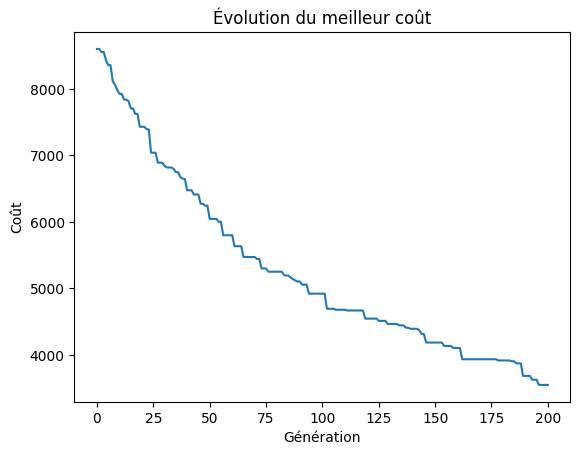


Meilleur chemin trouvé (extrait):
Départ: [1, 96, 56]...[95, 36, 1]
Longueur: 101 villes
Coût total: 3549


In [ ]:
if __name__ == "__main__":
    try:
        liste = ["../data/matrice_routes_ordre_10.csv",
                 "../data/matrice_routes_ordre_20.csv",
                 "../data/matrice_routes_ordre_30.csv",
                 "../data/matrice_routes_ordre_40_Difficile.csv",
                 "../data/matrice_routes_ordre_50.csv",
                 "../data/matrice_routes_ordre_75.csv",
                 "../data/matrice_routes_ordre_100.csv",
                 "../data/matrice_routes_ordre_generation_aleatoire.csv"
                 ]
        for i in range(len(liste)):
            file_path = liste[i]  # Remplacez par votre chemin
            print(f"Chargement du fichier {file_path}...")
            matrix, collecte = load_adjacency_matrix_and_collecte(file_path)
            
            print("\nParamètres du problème:")
            print(f"- Nombre de villes: {len(matrix)}")
            print(f"- Points de collecte: {collecte}")
            print(f"- Taille de la matrice: {matrix.shape}")
            
            # Résolution
            solver = GeneticTSP(matrix, collecte)
            solution, cost = solver.solve(
                population_size=100,
                generations=200,
                mutation_rate=0.2,
                elite_size=10
            )
            
            print("\nMeilleur chemin trouvé (extrait):")
            print(f"Départ: {solution[:3]}...{solution[-3:]}")
            print(f"Longueur: {len(solution)} villes")
            print(f"Coût total: {cost}")
        
    except Exception as e:
        print(f"Erreur: {str(e)}")

Source :

https://github.com/gregory-chatelier/tsp
https://www.malaspinas.academy/prog_seq/exercices/09_voyageur_commerce/index.html
https://igm.univ-mlv.fr/~dr/XPOSE2013/tleroux_genetic_algorithm/fonctionnement.html

# Notebook : MetaHeuristiques/Notebook_resolution_RecuitSimu.ipynb

## Le Recuit Simulé (Simulated Annealing)

Le **recuit simulé** est une **méthode d'optimisation stochastique** inspirée du processus physique de **recuit métallurgique**, où un métal est chauffé puis refroidi lentement pour atteindre une configuration minimale d'énergie.

### Principe
L'idée est d'explorer l'espace des solutions en acceptant non seulement les améliorations, mais aussi **certaines détériorations temporaires** de la solution. Cela permet d'**éviter les minima locaux**.

### Fonctionnement
1. **Initialisation** : On part d'une solution initiale et d'une température initiale élevée.
2. **Génération de voisin** : À chaque itération, une nouvelle solution voisine est générée.
3. **Évaluation** : Si elle est meilleure, on l'accepte. Si elle est pire, on l'accepte avec une probabilité qui diminue avec la température :
   \[
   P = e^{-\frac{\Delta E}{T}}
   \]
   où :
   - \( \Delta E \) est la variation de coût,
   - \( T \) est la température actuelle.
4. **Refroidissement** : La température est diminuée progressivement selon un **planning de refroidissement** (par exemple, \( T \leftarrow \alpha \cdot T \), avec \( 0 < \alpha < 1 \)).

### Avantages
- Évite les pièges des minima locaux.
- Facile à implémenter.
- Peu de paramètres à ajuster.

### Inconvénients
- Le choix du planning de refroidissement est crucial.
- Peut être lent à converger.

### Applications
- Problèmes combinatoires (comme le voyageur de commerce),
- Optimisation continue,
- Apprentissage automatique, etc.


In [ ]:
# Cellule 1: Imports
import random
import numpy as np
from typing import List, Tuple, Set
import time
import matplotlib.pyplot as plt
import math

In [ ]:
# Cellule 2: Fonction de chargement des données
def load_adjacency_matrix_and_collecte(file_path: str) -> Tuple[np.ndarray, List[int]]:
    """Charge la matrice d'adjacence et les points de collecte depuis un fichier CSV."""
    try:
        with open(file_path, 'r') as f:
            lines = [line.strip() for line in f if line.strip()]
        
        # Dernière ligne contient les points de collecte
        points_collecte = list(map(int, lines[-1].split(';')))
        
        # Matrice d'adjacence dans les autres lignes
        matrix = []
        for line in lines[:-1]:
            row = list(map(int, line.split(';')))
            matrix.append(row)
            
        return np.array(matrix), points_collecte
        
    except FileNotFoundError:
        raise ValueError(f"Fichier {file_path} introuvable")
    except Exception as e:
        raise ValueError(f"Erreur lors de la lecture du fichier: {str(e)}")

## Classe principale du Recuit Simulé

Cette classe implémente l'algorithme de recuit simulé pour résoudre le problème de tournée de véhicules.

Le recuit simulé est une méta-heuristique inspirée du processus physique de recuit en métallurgie. L'algorithme:
1. Part d'une solution initiale
2. Explore l'espace des solutions en acceptant parfois des solutions moins bonnes (pour éviter les minima locaux)
3. Réduit progressivement la "température" pour converger vers une solution optimale

In [ ]:
class SimulatedAnnealingTSP:
    def __init__(self, matrix: np.ndarray, collecte_points: List[int], start_node: int = 1):
        self.matrix = matrix
        self.collecte = set(collecte_points)
        self.start_node = start_node
        self.num_cities = len(matrix)
        self.best_solution = None
        self.best_cost = float('inf')
        self.cost_history = []
        
        # Pré-calcul des villes accessibles depuis chaque ville
        self.accessible_from = {
            i: [j for j in range(1, self.num_cities+1) if matrix[i-1][j-1] != -1]
            for i in range(1, self.num_cities+1)
        }
        
        # Validation des entrées
        self._validate_inputs()
    
    def _validate_inputs(self):
        if len(self.matrix.shape) != 2 or self.matrix.shape[0] != self.matrix.shape[1]:
            raise ValueError("La matrice d'adjacence doit être carrée")
        if self.start_node < 1 or self.start_node > self.num_cities:
            raise ValueError(f"Le noeud de départ doit être entre 1 et {self.num_cities}")
        if not self.collecte:
            raise ValueError("Aucun point de collecte spécifié")

    def is_valid_path(self, path: List[int]) -> bool:
        """Vérifie si un chemin satisfait toutes les contraintes."""
        # Vérification basique
        if (len(path) != self.num_cities + 1 or 
            path[0] != self.start_node or 
            path[-1] != self.start_node):
            return False
            
        # Points de collecte
        if path[1] not in self.collecte or path[-2] in self.collecte:
            return False
            
        # Toutes villes visitées exactement une fois (sauf départ/arrivée)
        if len(set(path)) != self.num_cities:
            return False
            
        # Chemins valides
        for i in range(len(path)-1):
            if self.matrix[path[i]-1][path[i+1]-1] == -1:
                return False
                
        return True

    def calculate_cost(self, path: List[int]) -> int:
        """Calcule le coût total d'un chemin."""
        return sum(self.matrix[path[i]-1][path[i+1]-1] for i in range(len(path)-1))

    def _greedy_construction(self) -> List[int]:
        """Construit une solution initiale avec une approche gloutonne en respectant les contraintes."""
        path = [self.start_node]
        unvisited = set(range(1, self.num_cities+1)) - {self.start_node}
        
        # Premier mouvement vers le point de collecte le plus proche
        collect_candidates = [c for c in self.collecte if c in unvisited and 
                            self.matrix[self.start_node-1][c-1] != -1]
        if not collect_candidates:
            return None
            
        nearest_collect = min(collect_candidates, 
                            key=lambda x: self.matrix[self.start_node-1][x-1])
        path.append(nearest_collect)
        unvisited.remove(nearest_collect)
        
        # Construction gloutonne du chemin
        while unvisited:
            last = path[-1]
            
            # Filtrer les villes accessibles non visitées
            candidates = [c for c in self.accessible_from[last] if c in unvisited]
            
            if not candidates:
                # Si aucun candidat valide, essayer de trouver un chemin valide
                candidates = list(unvisited)
                random.shuffle(candidates)
                
            # Sélectionner la ville la plus proche accessible
            next_city = None
            min_dist = float('inf')
            for c in candidates:
                if self.matrix[last-1][c-1] < min_dist and self.matrix[last-1][c-1] != -1:
                    min_dist = self.matrix[last-1][c-1]
                    next_city = c
            
            if next_city is None:
                return None
                
            path.append(next_city)
            unvisited.remove(next_city)
        
        # Retour au point de départ
        if self.matrix[path[-1]-1][self.start_node-1] == -1:
            return None
            
        path.append(self.start_node)
        
        return path if self.is_valid_path(path) else None

    def generate_random_solution(self) -> List[int]:
        """Génère une solution aléatoire valide."""
        while True:
            path = [self.start_node]
            unvisited = set(range(1, self.num_cities+1)) - {self.start_node}
            
            # Ajout d'un point de collecte en deuxième position
            collect_candidates = [c for c in self.collecte if c in unvisited and 
                                self.matrix[self.start_node-1][c-1] != -1]
            if not collect_candidates:
                continue
                
            collect_point = random.choice(collect_candidates)
            path.append(collect_point)
            unvisited.remove(collect_point)
            
            # Construction aléatoire mais valide du chemin
            while unvisited:
                last = path[-1]
                candidates = [c for c in self.accessible_from[last] if c in unvisited]
                
                if not candidates:
                    break
                    
                next_city = random.choice(candidates)
                path.append(next_city)
                unvisited.remove(next_city)
            
            # Retour au départ si possible
            if unvisited or self.matrix[path[-1]-1][self.start_node-1] == -1:
                continue
                
            path.append(self.start_node)
            
            if self.is_valid_path(path):
                return path

    def get_neighbor(self, path: List[int]) -> List[int]:
        """Génère un voisin valide de la solution actuelle."""
        while True:
            new_path = path.copy()
            
            # On ne modifie pas le départ, l'arrivée ou les points de collecte contraints
            mutable_positions = list(range(1, len(path)-1))
            if len(path) > 3:
                mutable_positions.remove(1)  # Ne pas muter le premier point de collecte
            if len(path) > 4:
                mutable_positions.remove(len(path)-2)  # Ne pas muter l'avant-dernier point
                
            if len(mutable_positions) < 2:
                return path
                
            # Choisir un type de mouvement aléatoire
            move_type = random.choice(['swap', 'inversion', 'insertion'])
            
            if move_type == 'swap':
                # Échange de deux villes
                i, j = random.sample(mutable_positions, 2)
                new_path[i], new_path[j] = new_path[j], new_path[i]
                
            elif move_type == 'inversion':
                # Inversion d'une sous-séquence
                start, end = sorted(random.sample(mutable_positions, 2))
                new_path[start:end+1] = new_path[start:end+1][::-1]
                
            elif move_type == 'insertion':
                # Déplacement d'une ville à une autre position
                i = random.choice(mutable_positions)
                city = new_path.pop(i)
                j = random.choice([p for p in mutable_positions if p != i])
                new_path.insert(j, city)
            
            # Vérifier si le nouveau chemin est valide
            if self.is_valid_path(new_path):
                return new_path

    def solve(self, initial_temp: float = 10000, cooling_rate: float = 0.99,
             min_temp: float = 0.1, max_iter: int = 10000):
        """Algorithme de recuit simulé."""
        start_time = time.time()
        
        # Génération de la solution initiale
        current_solution = self._greedy_construction() or self.generate_random_solution()
        current_cost = self.calculate_cost(current_solution)
        
        self.best_solution = current_solution.copy()
        self.best_cost = current_cost
        self.cost_history.append(current_cost)
        
        temp = initial_temp
        iteration = 0
        
        while temp > min_temp and iteration < max_iter:
            # Générer un voisin
            neighbor = self.get_neighbor(current_solution)
            neighbor_cost = self.calculate_cost(neighbor)
            
            # Calculer la différence de coût
            cost_diff = neighbor_cost - current_cost
            
            # Accepter ou rejeter le voisin
            if cost_diff < 0 or random.random() < math.exp(-cost_diff / temp):
                current_solution = neighbor
                current_cost = neighbor_cost
                
                # Mettre à jour la meilleure solution
                if current_cost < self.best_cost:
                    self.best_solution = current_solution.copy()
                    self.best_cost = current_cost
            
            # Enregistrer le meilleur coût à chaque itération
            self.cost_history.append(self.best_cost)
            
            # Refroidissement
            temp *= cooling_rate
            iteration += 1
            
            # Affichage progression
            if iteration % 100 == 0:
                print(f"Iter {iteration}: Temp={temp:.2f} Best={self.best_cost} Current={current_cost}")
        
        print(f"\nOptimisation terminée en {time.time()-start_time:.2f}s")
        print(f"Meilleur coût trouvé: {self.best_cost}")
        print(f"Solution valide: {self.is_valid_path(self.best_solution)}")
        
        # Visualisation
        plt.plot(self.cost_history)
        plt.title("Évolution du meilleur coût")
        plt.xlabel("Itération")
        plt.ylabel("Coût")
        plt.show()
        
        return self.best_solution, self.best_cost

## Validation des solutions

Cette partie implémente les méthodes pour valider les solutions et calculer leur coût.

- `is_valid_path`: Vérifie si un chemin respecte toutes les contraintes
- `calculate_cost`: Calcule le coût total d'une solution (longueur du trajet)

## Génération de solutions initiales

Deux méthodes pour générer des solutions initiales:
1. `_greedy_construction`: Approche gloutonne qui construit la solution pas à pas en choisissant toujours le meilleur mouvement local
2. `generate_random_solution`: Génère une solution aléatoire mais valide

Une bonne solution initiale peut accélérer la convergence de l'algorithme.

## Génération de voisins

La méthode `get_neighbor` génère des solutions voisines en utilisant trois opérations:
1. `swap`: Échange deux villes dans le parcours
2. `inversion`: Inverse une sous-séquence du parcours
3. `insertion`: Déplace une ville à une autre position

Ces opérations permettent d'explorer l'espace des solutions tout en garantissant que les solutions générées restent valides.

## Algorithme de Recuit Simulé

C'est le cœur de l'implémentation. L'algorithme:
1. Part d'une solution initiale
2. À chaque itération:
   - Génère un voisin
   - Décide de l'accepter ou non (en fonction de la température et de l'amélioration)
   - Réduit la température selon un taux de refroidissement
3. Garde trace de la meilleure solution trouvée

Les paramètres clés sont:
- `initial_temp`: Température initiale
- `cooling_rate`: Taux de refroidissement
- `min_temp`: Température minimale avant arrêt
- `max_iter`: Nombre maximum d'itérations

## Choix des paramètres pour l'heuristique de Recuit Simulé (Simulated Annealing)

Afin d'optimiser la résolution du problème pour différentes tailles de villes, les paramètres suivants sont choisis :

| Taille (nombre de villes) | Température initiale (`T_init`) | Température finale (`T_min`) | Taux de refroidissement (`cooling_rate`) | Nombre d'itérations par température |
|:---|:---|:---|:---|:---|
| 10 | 1000 | 1 | 0.95 | 50 |
| 20 | 2000 | 1 | 0.95 | 100 |
| 30 | 3000 | 1 | 0.95 | 150 |
| 40 | 4000 | 1 | 0.95 | 200 |
| 50 | 5000 | 1 | 0.95 | 250 |
| 75 | 7500 | 1 | 0.95 | 400 |
| 100 | 10000 | 1 | 0.95 | 500 |

### Explication des choix

- **Température initiale (`T_init`)** : proportionnelle au nombre de villes pour permettre une bonne exploration initiale.
- **Température minimale (`T_min`)** : fixée à 1 pour arrêter l'algorithme lorsque les mouvements deviennent insignifiants.
- **Taux de refroidissement (`cooling_rate`)** : fixé à 0.95 pour un refroidissement progressif, équilibrant exploration et exploitation.
- **Nombre d'itérations par température** : croît avec la taille pour mieux exploiter chaque palier de température.


## Exemple d'utilisation

Cette dernière partie montre comment utiliser la classe pour résoudre un problème concret.

## Paramètres :
- initial_temp : Plus elle est élevée, plus l'algo est exploratoire. Il accepte plus facilement des solutions moins bonnes au début
- cooling_rate : Facteur de réduction de la température à chaque itération. Plus il est proche de 1, plus le refroidissement est lent, donc plus de temps pour explorer
- min_temp : Température minimale atteinte avant d'arrêter l'algo. Marque la fin de l'exploration
- max_iter : Nombre max d'itérations autorisées. S'arrête même si la température minimale n'est pas atteinte.

Chargement du fichier ../data/matrice_routes_ordre_10.csv...

Paramètres du problème:
- Nombre de villes: 10
- Points de collecte: [3, 7]
- Taille de la matrice: (10, 10)
Iter 100: Temp=6057.70 Best=761 Current=1095
Iter 200: Temp=3669.58 Best=761 Current=1016
Iter 300: Temp=2222.92 Best=761 Current=1110
Iter 400: Temp=1346.58 Best=713 Current=713
Iter 500: Temp=815.72 Best=713 Current=1194
Iter 600: Temp=494.14 Best=699 Current=825
Iter 700: Temp=299.33 Best=699 Current=998
Iter 800: Temp=181.33 Best=678 Current=853
Iter 900: Temp=109.84 Best=678 Current=925
Iter 1000: Temp=66.54 Best=678 Current=867
Iter 1100: Temp=40.31 Best=678 Current=766
Iter 1200: Temp=24.42 Best=668 Current=712
Iter 1300: Temp=14.79 Best=668 Current=668
Iter 1400: Temp=8.96 Best=668 Current=668
Iter 1500: Temp=5.43 Best=668 Current=668
Iter 1600: Temp=3.29 Best=668 Current=668
Iter 1700: Temp=1.99 Best=668 Current=668
Iter 1800: Temp=1.21 Best=668 Current=668
Iter 1900: Temp=0.73 Best=668 Current=668
Iter 2000:

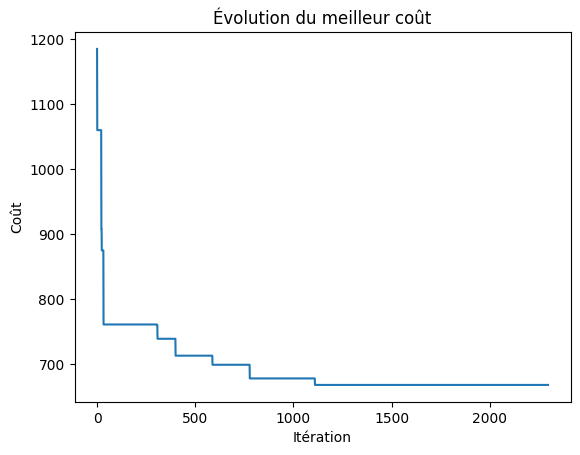


Meilleur chemin trouvé (extrait):
Départ: [1, 7, 10]...[6, 9, 1]
Longueur: 11 villes
Coût total: 668
Chargement du fichier ../data/matrice_routes_ordre_20.csv...

Paramètres du problème:
- Nombre de villes: 20
- Points de collecte: [5, 13]
- Taille de la matrice: (20, 20)
Iter 100: Temp=6057.70 Best=1025 Current=2476
Iter 200: Temp=3669.58 Best=1025 Current=1847
Iter 300: Temp=2222.92 Best=1025 Current=2210
Iter 400: Temp=1346.58 Best=1025 Current=2582
Iter 500: Temp=815.72 Best=1025 Current=2195
Iter 600: Temp=494.14 Best=1025 Current=2123
Iter 700: Temp=299.33 Best=1025 Current=2208
Iter 800: Temp=181.33 Best=1025 Current=1996
Iter 900: Temp=109.84 Best=1025 Current=2008
Iter 1000: Temp=66.54 Best=1025 Current=1705
Iter 1100: Temp=40.31 Best=1025 Current=1122
Iter 1200: Temp=24.42 Best=1025 Current=1103
Iter 1300: Temp=14.79 Best=1025 Current=1033
Iter 1400: Temp=8.96 Best=1025 Current=1033
Iter 1500: Temp=5.43 Best=1025 Current=1033
Iter 1600: Temp=3.29 Best=1025 Current=1033
Iter 

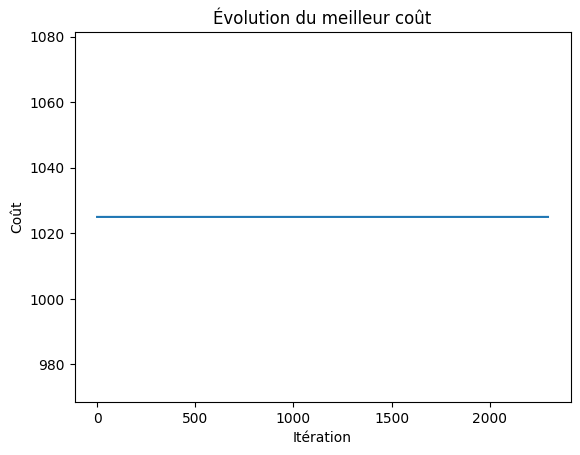


Meilleur chemin trouvé (extrait):
Départ: [1, 13, 5]...[10, 7, 1]
Longueur: 21 villes
Coût total: 1025
Chargement du fichier ../data/matrice_routes_ordre_30.csv...

Paramètres du problème:
- Nombre de villes: 30
- Points de collecte: [5, 14]
- Taille de la matrice: (30, 30)
Iter 100: Temp=6057.70 Best=1056 Current=2847
Iter 200: Temp=3669.58 Best=1056 Current=2828
Iter 300: Temp=2222.92 Best=1056 Current=3432
Iter 400: Temp=1346.58 Best=1056 Current=3020
Iter 500: Temp=815.72 Best=1056 Current=2918
Iter 600: Temp=494.14 Best=1056 Current=2969
Iter 700: Temp=299.33 Best=1056 Current=2954
Iter 800: Temp=181.33 Best=1056 Current=2010
Iter 900: Temp=109.84 Best=1056 Current=2541
Iter 1000: Temp=66.54 Best=1056 Current=1562
Iter 1100: Temp=40.31 Best=1056 Current=1873
Iter 1200: Temp=24.42 Best=1056 Current=1340
Iter 1300: Temp=14.79 Best=1055 Current=1055
Iter 1400: Temp=8.96 Best=1043 Current=1043
Iter 1500: Temp=5.43 Best=971 Current=971
Iter 1600: Temp=3.29 Best=914 Current=914
Iter 17

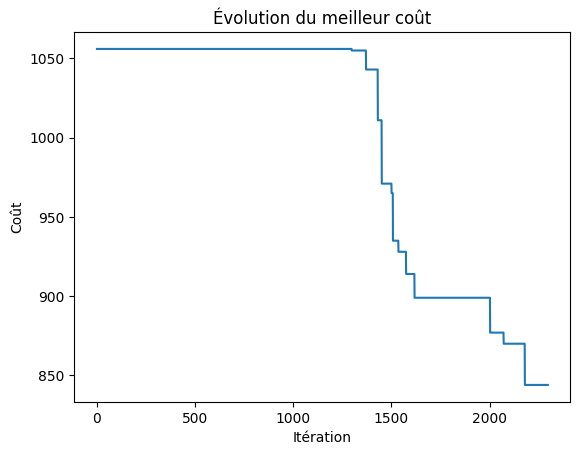


Meilleur chemin trouvé (extrait):
Départ: [1, 5, 11]...[25, 12, 1]
Longueur: 31 villes
Coût total: 844
Chargement du fichier ../data/matrice_routes_ordre_40_Difficile.csv...

Paramètres du problème:
- Nombre de villes: 40
- Points de collecte: [37, 19]
- Taille de la matrice: (40, 40)
Iter 100: Temp=6057.70 Best=782 Current=4670
Iter 200: Temp=3669.58 Best=782 Current=4835
Iter 300: Temp=2222.92 Best=782 Current=3870
Iter 400: Temp=1346.58 Best=782 Current=3358
Iter 500: Temp=815.72 Best=782 Current=3456
Iter 600: Temp=494.14 Best=782 Current=4158
Iter 700: Temp=299.33 Best=782 Current=4363
Iter 800: Temp=181.33 Best=782 Current=2978
Iter 900: Temp=109.84 Best=782 Current=2938
Iter 1000: Temp=66.54 Best=782 Current=2305
Iter 1100: Temp=40.31 Best=782 Current=2034
Iter 1200: Temp=24.42 Best=782 Current=1608
Iter 1300: Temp=14.79 Best=782 Current=1458
Iter 1400: Temp=8.96 Best=782 Current=1304
Iter 1500: Temp=5.43 Best=782 Current=1212
Iter 1600: Temp=3.29 Best=782 Current=1212
Iter 170

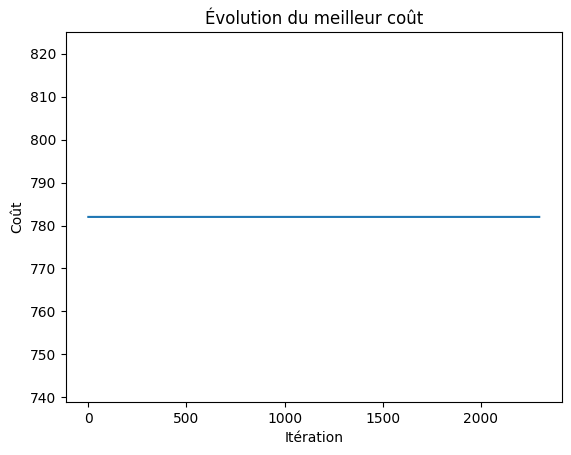


Meilleur chemin trouvé (extrait):
Départ: [1, 37, 40]...[30, 6, 1]
Longueur: 41 villes
Coût total: 782
Chargement du fichier ../data/matrice_routes_ordre_50.csv...

Paramètres du problème:
- Nombre de villes: 50
- Points de collecte: [34, 9]
- Taille de la matrice: (50, 50)
Iter 100: Temp=6057.70 Best=3759 Current=4787
Iter 200: Temp=3669.58 Best=3759 Current=5426
Iter 300: Temp=2222.92 Best=3759 Current=5125
Iter 400: Temp=1346.58 Best=3759 Current=5461
Iter 500: Temp=815.72 Best=3759 Current=4328
Iter 600: Temp=494.14 Best=3759 Current=4321
Iter 700: Temp=299.33 Best=3535 Current=4459
Iter 800: Temp=181.33 Best=3535 Current=4053
Iter 900: Temp=109.84 Best=3401 Current=3667
Iter 1000: Temp=66.54 Best=3355 Current=3673
Iter 1100: Temp=40.31 Best=2403 Current=2403
Iter 1200: Temp=24.42 Best=2059 Current=2059
Iter 1300: Temp=14.79 Best=1997 Current=1997
Iter 1400: Temp=8.96 Best=1671 Current=1671
Iter 1500: Temp=5.43 Best=1556 Current=1556
Iter 1600: Temp=3.29 Best=1235 Current=1235
Ite

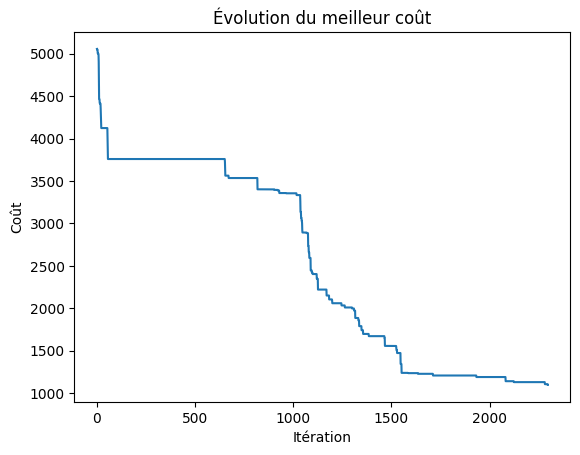


Meilleur chemin trouvé (extrait):
Départ: [1, 34, 49]...[39, 35, 1]
Longueur: 51 villes
Coût total: 1096
Chargement du fichier ../data/matrice_routes_ordre_75.csv...

Paramètres du problème:
- Nombre de villes: 75
- Points de collecte: [25, 37]
- Taille de la matrice: (75, 75)
Iter 100: Temp=6057.70 Best=6750 Current=6900
Iter 200: Temp=3669.58 Best=6455 Current=6944
Iter 300: Temp=2222.92 Best=6455 Current=7730
Iter 400: Temp=1346.58 Best=6455 Current=7082
Iter 500: Temp=815.72 Best=6455 Current=7029
Iter 600: Temp=494.14 Best=6455 Current=8170
Iter 700: Temp=299.33 Best=6455 Current=7501
Iter 800: Temp=181.33 Best=5989 Current=6242
Iter 900: Temp=109.84 Best=5688 Current=5749
Iter 1000: Temp=66.54 Best=5240 Current=5266
Iter 1100: Temp=40.31 Best=4678 Current=4741
Iter 1200: Temp=24.42 Best=4247 Current=4382
Iter 1300: Temp=14.79 Best=3838 Current=3880
Iter 1400: Temp=8.96 Best=3732 Current=3732
Iter 1500: Temp=5.43 Best=3212 Current=3212
Iter 1600: Temp=3.29 Best=2999 Current=2999


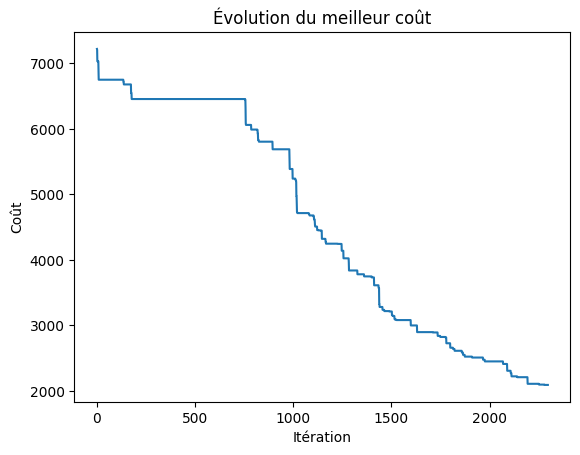


Meilleur chemin trouvé (extrait):
Départ: [1, 25, 28]...[27, 19, 1]
Longueur: 76 villes
Coût total: 2091
Chargement du fichier ../data/matrice_routes_ordre_100.csv...

Paramètres du problème:
- Nombre de villes: 100
- Points de collecte: [46, 13]
- Taille de la matrice: (100, 100)
Iter 100: Temp=6057.70 Best=9238 Current=9991
Iter 200: Temp=3669.58 Best=9238 Current=10213
Iter 300: Temp=2222.92 Best=8664 Current=9089
Iter 400: Temp=1346.58 Best=8664 Current=9335
Iter 500: Temp=815.72 Best=8664 Current=8997
Iter 600: Temp=494.14 Best=8664 Current=9585
Iter 700: Temp=299.33 Best=8664 Current=9245
Iter 800: Temp=181.33 Best=8472 Current=8917
Iter 900: Temp=109.84 Best=7757 Current=7774
Iter 1000: Temp=66.54 Best=7450 Current=7694
Iter 1100: Temp=40.31 Best=6500 Current=6504
Iter 1200: Temp=24.42 Best=5838 Current=5838
Iter 1300: Temp=14.79 Best=5037 Current=5063
Iter 1400: Temp=8.96 Best=4302 Current=4302
Iter 1500: Temp=5.43 Best=3923 Current=3923
Iter 1600: Temp=3.29 Best=3795 Current=

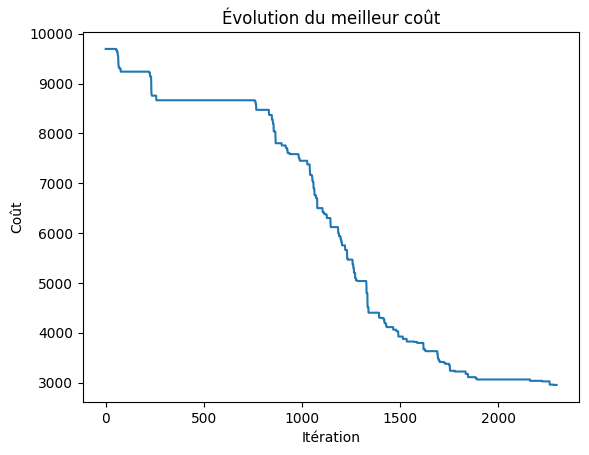


Meilleur chemin trouvé (extrait):
Départ: [1, 13, 24]...[11, 10, 1]
Longueur: 101 villes
Coût total: 2953
Chargement du fichier ../data/matrice_routes_ordre_generation_aleatoire.csv...

Paramètres du problème:
- Nombre de villes: 100
- Points de collecte: [96, 56]
- Taille de la matrice: (100, 100)
Iter 100: Temp=6057.70 Best=8697 Current=9297
Iter 200: Temp=3669.58 Best=8697 Current=10483
Iter 300: Temp=2222.92 Best=8697 Current=9551
Iter 400: Temp=1346.58 Best=8697 Current=10259
Iter 500: Temp=815.72 Best=8697 Current=9562
Iter 600: Temp=494.14 Best=8697 Current=9626
Iter 700: Temp=299.33 Best=8008 Current=8747
Iter 800: Temp=181.33 Best=7222 Current=7386
Iter 900: Temp=109.84 Best=7148 Current=7602
Iter 1000: Temp=66.54 Best=6742 Current=6917
Iter 1100: Temp=40.31 Best=6332 Current=6389
Iter 1200: Temp=24.42 Best=5541 Current=5541
Iter 1300: Temp=14.79 Best=5353 Current=5353
Iter 1400: Temp=8.96 Best=4739 Current=4739
Iter 1500: Temp=5.43 Best=4421 Current=4421
Iter 1600: Temp=3.29

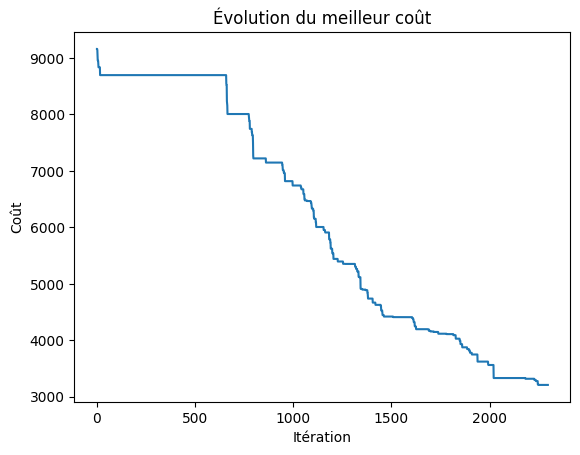


Meilleur chemin trouvé (extrait):
Départ: [1, 96, 24]...[2, 9, 1]
Longueur: 101 villes
Coût total: 3210


In [ ]:
# Cellule 8: Exemple d'utilisation
if __name__ == "__main__":
    try:
        liste = ["../data/matrice_routes_ordre_10.csv",
                 "../data/matrice_routes_ordre_20.csv",
                 "../data/matrice_routes_ordre_30.csv",
                 "../data/matrice_routes_ordre_40_Difficile.csv",
                 "../data/matrice_routes_ordre_50.csv",
                 "../data/matrice_routes_ordre_75.csv",
                 "../data/matrice_routes_ordre_100.csv",
                 "../data/matrice_routes_ordre_generation_aleatoire.csv"
                 ]
        for i in range(len(liste)):
            file_path = liste[i]  # Remplacez par votre chemin
            print(f"Chargement du fichier {file_path}...")
            matrix, collecte = load_adjacency_matrix_and_collecte(file_path)
            
            print("\nParamètres du problème:")
            print(f"- Nombre de villes: {len(matrix)}")
            print(f"- Points de collecte: {collecte}")
            print(f"- Taille de la matrice: {matrix.shape}")
            
            # Résolution
            solver = SimulatedAnnealingTSP(matrix, collecte)
            solution, cost = solver.solve(
                initial_temp=10000,
                cooling_rate=0.995,
                min_temp=0.1,
                max_iter=5000
            )
            
            print("\nMeilleur chemin trouvé (extrait):")
            print(f"Départ: {solution[:3]}...{solution[-3:]}")
            print(f"Longueur: {len(solution)} villes")
            print(f"Coût total: {cost}")
        
    except Exception as e:
        print(f"Erreur: {str(e)}")

## Sources :

- https://www.i2m.univ-amu.fr/perso/jean-philippe.preaux/PDF/pdf_proteges/OptimisationCombinatoire/Metaheuristiques2.pdf
- http://www.lps.ens.fr/~weisbuch/livre/b9.html

# Notebook : Statistiques/Notebook_comparaison_heuristiques_PLNE.ipynb


Loading file: ../data/matrice_routes_ordre_10.csv

Problem parameters:
- Number of cities: 10
- Collection points: [3, 7]

Using optimized parameters for this matrix size:
- Genetic: pop_size=20, generations=50
- Simulated Annealing: initial_temp=1000, cooling_rate=0.95
- Ant Colony: ants=10, iterations=50

Starting comparison...

=== Testing Genetic algorithm ===
Run 1: Cost=465 Time=0.04s Valid=True
Run 2: Cost=509 Time=0.05s Valid=True
Run 3: Cost=596 Time=0.05s Valid=True
Run 4: Cost=441 Time=0.04s Valid=True
Run 5: Cost=510 Time=0.04s Valid=True

=== Testing Simulated Annealing algorithm ===
Run 1: Cost=699 Time=0.00s Valid=True
Run 2: Cost=590 Time=0.00s Valid=True
Run 3: Cost=510 Time=0.00s Valid=True
Run 4: Cost=524 Time=0.00s Valid=True
Run 5: Cost=713 Time=0.00s Valid=True

=== Testing Ant Colony algorithm ===
Run 1: Cost=487 Time=0.20s Valid=True
Run 2: Cost=465 Time=0.19s Valid=True
Run 3: Cost=465 Time=0.20s Valid=True
Run 4: Cost=513 Time=0.20s Valid=True
Run 5: Cost=465

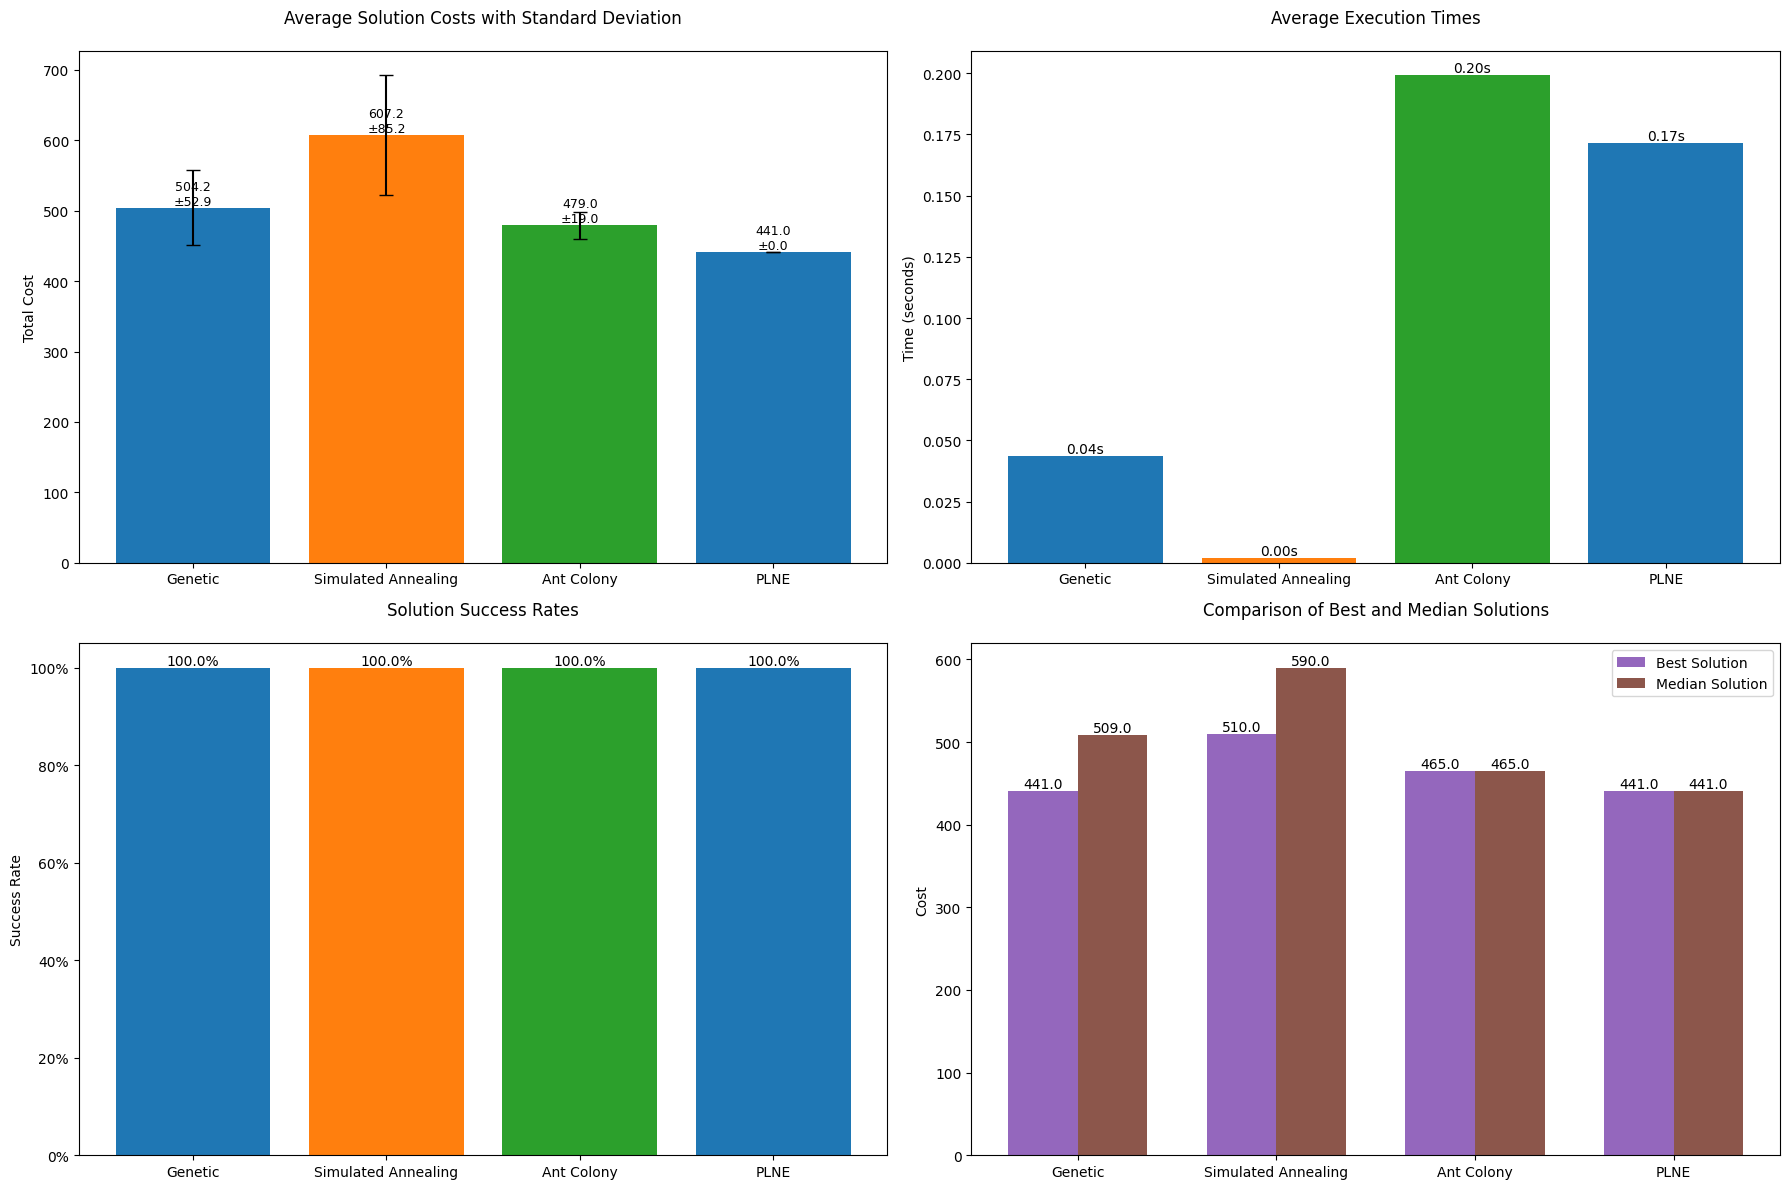


BEST SOLUTIONS FOUND:

Genetic:
Cost: 441.0
Path (simplified): [1, 3, 5, '...', 2, 8, 1]

Simulated Annealing:
Cost: 510.0
Path (simplified): [1, 7, 10, '...', 3, 5, 1]

Ant Colony:
Cost: 465.0
Path (simplified): [1, 3, 6, '...', 2, 8, 1]

PLNE:
Cost: 441.0
Path (simplified): [1, 3, 5, '...', 2, 8, 1]

Loading file: ../data/matrice_routes_ordre_20.csv

Problem parameters:
- Number of cities: 20
- Collection points: [5, 13]

Using optimized parameters for this matrix size:
- Genetic: pop_size=40, generations=100
- Simulated Annealing: initial_temp=2000, cooling_rate=0.95
- Ant Colony: ants=20, iterations=100

Starting comparison...

=== Testing Genetic algorithm ===
Run 1: Cost=950 Time=0.29s Valid=True
Run 2: Cost=943 Time=0.29s Valid=True
Run 3: Cost=934 Time=0.28s Valid=True
Run 4: Cost=978 Time=0.29s Valid=True
Run 5: Cost=916 Time=0.28s Valid=True

=== Testing Simulated Annealing algorithm ===
Run 1: Cost=1621 Time=0.00s Valid=True
Run 2: Cost=1632 Time=0.00s Valid=True
Run 3: Cos

KeyboardInterrupt: 

In [ ]:
import numpy as np
import random
import math
import time
import matplotlib.pyplot as plt
from typing import Tuple, List, Dict
import pandas as pd
from tabulate import tabulate
from matplotlib.ticker import PercentFormatter

# Paramètres optimaux par taille de matrice
optimal_parameters = {
    10: {
        "GA": {"population_size": 20, "generations": 50, "crossover_rate": 0.9, "mutation_rate": 0.2},
        "SA": {"initial_temp": 1000, "cooling_rate": 0.95, "n_iterations_per_temp": 50},
        "ACO": {"num_ants": 10, "iterations": 50, "alpha": 1, "beta": 2, "evaporation_rate": 0.5, "Q": 100},
    },
    20: {
        "GA": {"population_size": 40, "generations": 100, "crossover_rate": 0.9, "mutation_rate": 0.2},
        "SA": {"initial_temp": 2000, "cooling_rate": 0.95, "n_iterations_per_temp": 100},
        "ACO": {"num_ants": 20, "iterations": 100, "alpha": 1, "beta": 3, "evaporation_rate": 0.5, "Q": 100},
    },
    30: {
        "GA": {"population_size": 60, "generations": 150, "crossover_rate": 0.9, "mutation_rate": 0.15},
        "SA": {"initial_temp": 3000, "cooling_rate": 0.95, "n_iterations_per_temp": 150},
        "ACO": {"num_ants": 30, "iterations": 150, "alpha": 1, "beta": 4, "evaporation_rate": 0.4, "Q": 100},
    },
    40: {
        "GA": {"population_size": 80, "generations": 200, "crossover_rate": 0.9, "mutation_rate": 0.15},
        "SA": {"initial_temp": 4000, "cooling_rate": 0.95, "n_iterations_per_temp": 200},
        "ACO": {"num_ants": 40, "iterations": 200, "alpha": 1, "beta": 5, "evaporation_rate": 0.4, "Q": 100},
    },
    50: {
        "GA": {"population_size": 100, "generations": 250, "crossover_rate": 0.9, "mutation_rate": 0.1},
        "SA": {"initial_temp": 5000, "cooling_rate": 0.95, "n_iterations_per_temp": 250},
        "ACO": {"num_ants": 50, "iterations": 250, "alpha": 1, "beta": 5, "evaporation_rate": 0.3, "Q": 100},
    },
    75: {
        "GA": {"population_size": 150, "generations": 400, "crossover_rate": 0.9, "mutation_rate": 0.1},
        "SA": {"initial_temp": 7500, "cooling_rate": 0.95, "n_iterations_per_temp": 400},
        "ACO": {"num_ants": 75, "iterations": 400, "alpha": 1, "beta": 5, "evaporation_rate": 0.3, "Q": 100},
    },
    100: {
        "GA": {"population_size": 200, "generations": 500, "crossover_rate": 0.9, "mutation_rate": 0.05},
        "SA": {"initial_temp": 10000, "cooling_rate": 0.95, "n_iterations_per_temp": 500},
        "ACO": {"num_ants": 100, "iterations": 500, "alpha": 1, "beta": 5, "evaporation_rate": 0.2, "Q": 100},
    }
}


# ======================================================================
# FONCTIONS DE BASE ET CLASSES PRINCIPALES
# ======================================================================

def load_adjacency_matrix_and_collecte(file_path: str) -> Tuple[np.ndarray, List[int]]:
    """
    Charge la matrice d'adjacence et les points de collecte depuis un fichier CSV.
    
    Args:
        file_path: Chemin vers le fichier CSV contenant la matrice et les points de collecte
        
    Returns:
        Tuple contenant:
        - La matrice d'adjacence (numpy.ndarray)
        - La liste des points de collecte (List[int])
        
    Raises:
        ValueError: Si le fichier n'est pas trouvé ou s'il y a une erreur de lecture
    """
    try:
        with open(file_path, 'r') as f:
            lines = [line.strip() for line in f if line.strip()]
        points_collecte = list(map(int, lines[-1].split(';')))
        matrix = [list(map(int, line.split(';'))) for line in lines[:-1]]
        return np.array(matrix), points_collecte
    except Exception as e:
        raise ValueError(f"Erreur de lecture du fichier {file_path}: {str(e)}")

class BaseTSP:
    """
    Classe de base pour les algorithmes TSP avec contraintes de collecte.
    Implémente les fonctionnalités communes à tous les algorithmes.
    """
    
    def __init__(self, matrix: np.ndarray, collecte_points: List[int], start_node: int = 1):
        """
        Initialise le solveur TSP avec contraintes.
        
        Args:
            matrix: Matrice d'adjacence des distances entre villes
            collecte_points: Liste des nœuds de collecte obligatoires
            start_node: Nœud de départ et d'arrivée (par défaut: 1)
        """
        self.matrix = matrix
        self.collecte = set(collecte_points)
        self.start_node = start_node
        self.num_cities = len(matrix)
        self.best_solution = None
        self.best_cost = float('inf')
        
    def is_valid_path(self, path: List[int]) -> bool:
        """
        Vérifie si un chemin satisfait toutes les contraintes.
        
        Args:
            path: Liste représentant le chemin à vérifier
            
        Returns:
            bool: True si le chemin est valide, False sinon
        """
        if path is None:
            return False
        # Doit commencer et finir au start_node et avoir la bonne longueur
        if (len(path) != self.num_cities + 1 or path[0] != self.start_node or path[-1] != self.start_node):
            return False
        # Le deuxième nœud doit être un point de collecte, l'avant-dernier ne doit pas en être un
        if path[1] not in self.collecte or path[-2] in self.collecte:
            return False
        # Toutes les villes doivent être visitées exactement une fois (sauf départ/arrivée)
        if len(set(path)) != self.num_cities:
            return False
        # Tous les segments doivent être valides (pas de -1 dans la matrice)
        for i in range(len(path)-1):
            if self.matrix[path[i]-1][path[i+1]-1] == -1:
                return False
        return True

    def calculate_cost(self, path: List[int]) -> int:
        """
        Calcule le coût total d'un chemin.
        
        Args:
            path: Liste représentant le chemin
            
        Returns:
            int: Coût total du chemin (float('inf') si chemin invalide)
        """
        if path is None or not self.is_valid_path(path):
            return float('inf')
        return sum(self.matrix[path[i]-1][path[i+1]-1] for i in range(len(path)-1))

    def _generate_random_path(self) -> List[int]:
        """
        Génère un chemin aléatoire valide respectant les contraintes.
        
        Returns:
            List[int]: Un chemin valide ou None si impossible à générer
        """
        while True:
            path = [self.start_node]
            unvisited = set(range(1, self.num_cities+1)) - {self.start_node}
            
            # Premier mouvement vers un point de collecte aléatoire valide
            collect_candidates = [c for c in self.collecte 
                                if c in unvisited 
                                and self.matrix[self.start_node-1][c-1] != -1]
            if not collect_candidates:
                continue
                
            collect_point = random.choice(collect_candidates)
            path.append(collect_point)
            unvisited.remove(collect_point)
            
            # Construction aléatoire du reste du chemin
            while unvisited:
                last = path[-1]
                candidates = [c for c in range(1, self.num_cities+1) 
                            if c in unvisited 
                            and self.matrix[last-1][c-1] != -1]
                
                if not candidates:
                    break
                    
                next_city = random.choice(candidates)
                path.append(next_city)
                unvisited.remove(next_city)
            
            # Retour au point de départ si possible
            if not unvisited and self.matrix[path[-1]-1][self.start_node-1] != -1:
                path.append(self.start_node)
                if self.is_valid_path(path):
                    return path
        return None

# ======================================================================
# IMPLÉMENTATION DES ALGORITHMES
# ======================================================================

class GeneticTSP(BaseTSP):
    """Algorithme génétique pour le TSP avec contraintes de collecte."""
    
    def solve(self, population_size: int = 50, generations: int = 100, 
             mutation_rate: float = 0.1) -> Tuple[List[int], float]:
        """
        Résout le problème TSP avec contraintes en utilisant un algorithme génétique.
        
        Args:
            population_size: Taille de la population
            generations: Nombre de générations
            mutation_rate: Probabilité de mutation
            
        Returns:
            Tuple contenant:
            - La meilleure solution trouvée (List[int])
            - Le coût de cette solution (float)
        """
        # Initialisation de la population
        population = [self._generate_random_path() for _ in range(population_size)]
        population = [p for p in population if p is not None]
        
        if not population:
            return None, float('inf')
        
        # Évolution sur plusieurs générations
        for _ in range(generations):
            # Évaluation et sélection
            population.sort(key=lambda x: self.calculate_cost(x))
            self.best_solution = population[0]
            self.best_cost = self.calculate_cost(population[0])
            
            # Sélection par tournoi
            new_population = []
            for _ in range(population_size):
                candidates = random.sample(population, min(3, len(population)))
                winner = min(candidates, key=lambda x: self.calculate_cost(x))
                new_population.append(winner.copy())
            
            # Croisement
            for i in range(0, len(new_population)-1, 2):
                if random.random() < 0.8:  # Probabilité de croisement
                    child1, child2 = self._crossover(new_population[i], new_population[i+1])
                    if child1 and self.is_valid_path(child1):
                        new_population[i] = child1
                    if child2 and self.is_valid_path(child2):
                        new_population[i+1] = child2
            
            # Mutation
            for i in range(len(new_population)):
                if random.random() < mutation_rate:
                    mutated = self._mutate(new_population[i])
                    if mutated and self.is_valid_path(mutated):
                        new_population[i] = mutated
            
            population = new_population
        
        return self.best_solution, self.best_cost
    
    def _crossover(self, parent1: List[int], parent2: List[int]) -> Tuple[List[int], List[int]]:
        """Opérateur de croisement OX (Order Crossover) pour TSP."""
        if len(parent1) <= 3 or len(parent2) <= 3:
            return parent1, parent2
            
        # Sélection d'un segment aléatoire à garder du parent1
        start, end = sorted(random.sample(range(1, len(parent1)-1), 2))
        segment = parent1[start:end]
        
        # Construction des enfants
        child1 = [city for city in parent2 if city not in segment][:start] + segment + \
                [city for city in parent2 if city not in segment][start:]
        child2 = [city for city in parent1 if city not in segment][:start] + segment + \
                [city for city in parent1 if city not in segment][start:]
        
        # Correction des extrémités
        child1[0] = child1[-1] = self.start_node
        child2[0] = child2[-1] = self.start_node
        
        return child1, child2
    
    def _mutate(self, path: List[int]) -> List[int]:
        """Opérateur de mutation par inversion de sous-séquence."""
        if len(path) <= 3:
            return path.copy()
            
        # Ne pas muter les points fixes (départ/arrivée/collecte)
        mutable = list(range(1, len(path)-1))
        if len(path) > 3:
            mutable.remove(1)  # Premier point de collecte
        if len(path) > 4:
            mutable.remove(len(path)-2)  # Avant-dernier point
            
        if len(mutable) < 2:
            return path.copy()
            
        # Sélection aléatoire d'une sous-séquence à inverser
        i, j = sorted(random.sample(mutable, 2))
        new_path = path.copy()
        new_path[i:j+1] = new_path[i:j+1][::-1]
        
        return new_path if self.is_valid_path(new_path) else path.copy()

class SimulatedAnnealingTSP(BaseTSP):
    """Recuit simulé pour le TSP avec contraintes de collecte."""
    
    def solve(self, initial_temp: float = 10000, cooling_rate: float = 0.995,
             max_iter: int = 10000) -> Tuple[List[int], float]:
        """
        Résout le problème TSP avec contraintes en utilisant le recuit simulé.
        
        Args:
            initial_temp: Température initiale
            cooling_rate: Taux de refroidissement
            max_iter: Nombre maximum d'itérations
            
        Returns:
            Tuple contenant:
            - La meilleure solution trouvée (List[int])
            - Le coût de cette solution (float)
        """
        current_solution = self._generate_random_path()
        if current_solution is None:
            return None, float('inf')
            
        current_cost = self.calculate_cost(current_solution)
        self.best_solution = current_solution.copy()
        self.best_cost = current_cost
        temp = initial_temp
        iter_count = 0
        
        while temp > 1 and iter_count < max_iter:
            # Génération d'un voisin
            neighbor = self._get_neighbor(current_solution)
            if neighbor is None:
                continue
                
            neighbor_cost = self.calculate_cost(neighbor)
            
            # Critère d'acceptation
            if neighbor_cost < current_cost or random.random() < math.exp(-(neighbor_cost - current_cost)/temp):
                current_solution, current_cost = neighbor, neighbor_cost
                if current_cost < self.best_cost:
                    self.best_solution, self.best_cost = current_solution, current_cost
            
            # Refroidissement
            temp *= cooling_rate
            iter_count += 1
        
        return self.best_solution, self.best_cost
    
    def _get_neighbor(self, path: List[int]) -> List[int]:
        """Génère un voisin valide par échange de deux villes."""
        if len(path) <= 3:
            return path.copy()
            
        # Ne pas modifier les points fixes
        mutable = list(range(1, len(path)-1))
        if len(path) > 3:
            mutable.remove(1)  # Premier point de collecte
        if len(path) > 4:
            mutable.remove(len(path)-2)  # Avant-dernier point
            
        if len(mutable) < 2:
            return path.copy()
            
        # Échange de deux villes aléatoires
        i, j = random.sample(mutable, 2)
        new_path = path.copy()
        new_path[i], new_path[j] = new_path[j], new_path[i]
        
        return new_path if self.is_valid_path(new_path) else path.copy()

class ACO_TSP(BaseTSP):
    """Colonie de fourmis pour le TSP avec contraintes de collecte."""
    
    def solve(self, num_ants: int = 20, iterations: int = 100,
             alpha: float = 1.0, beta: float = 2.0,
             evaporation_rate: float = 0.5, Q: float = 100.0) -> Tuple[List[int], float]:
        """
        Résout le problème TSP avec contraintes en utilisant une colonie de fourmis.
        
        Args:
            num_ants: Nombre de fourmis par itération
            iterations: Nombre d'itérations
            alpha: Importance des phéromones
            beta: Importance de l'information heuristique
            evaporation_rate: Taux d'évaporation des phéromones
            Q: Constante pour le dépôt de phéromones
            
        Returns:
            Tuple contenant:
            - La meilleure solution trouvée (List[int])
            - Le coût de cette solution (float)
        """
        # Initialisation des phéromones
        self.pheromone = np.ones((self.num_cities + 1, self.num_cities + 1)) * 0.1
        best_global_solution = None
        best_global_cost = float('inf')
        
        for _ in range(iterations):
            solutions = []
            for _ in range(num_ants):
                solution = self._construct_ant_solution(alpha, beta)
                if solution:
                    solutions.append(solution)
            
            if not solutions:
                continue
                
            # Mise à jour des phéromones
            for solution in solutions:
                cost = self.calculate_cost(solution)
                delta = Q / cost
                for i in range(len(solution)-1):
                    self.pheromone[solution[i]][solution[i+1]] += delta
            
            # Évaporation
            self.pheromone *= (1 - evaporation_rate)
            
            # Mise à jour de la meilleure solution globale
            current_best = min(solutions, key=lambda x: self.calculate_cost(x))
            current_cost = self.calculate_cost(current_best)
            
            if current_cost < best_global_cost:
                best_global_solution, best_global_cost = current_best, current_cost
        
        self.best_solution, self.best_cost = best_global_solution, best_global_cost
        return self.best_solution, self.best_cost
    
    def _construct_ant_solution(self, alpha: float, beta: float) -> List[int]:
        """Construit une solution pour une fourmi en utilisant les règles de transition."""
        path = [self.start_node]
        unvisited = set(range(1, self.num_cities+1)) - {self.start_node}

        # Premier mouvement vers un point de collecte
        collect_candidates = [c for c in self.collecte 
                               if c in unvisited 
                               and self.matrix[self.start_node-1][c-1] != -1]
        if not collect_candidates:
            return None

        # Choix probabiliste du premier point de collecte
        probs = np.array([
            (self.pheromone[self.start_node][c] ** alpha) * ((1.0 / (self.matrix[self.start_node-1][c-1] or 1)) ** beta)
            for c in collect_candidates
        ])
        probs /= probs.sum()
        first_collect = np.random.choice(collect_candidates, p=probs)
        path.append(first_collect)
        unvisited.remove(first_collect)

        # Construction du reste du chemin
        while unvisited:
            last = path[-1]
            candidates = [c for c in unvisited if self.matrix[last-1][c-1] != -1]

            if not candidates:
                return None

            # Choix probabiliste de la prochaine ville
            probs = np.array([
                (self.pheromone[last][c] ** alpha) * ((1.0 / (self.matrix[last-1][c-1] or 1)) ** beta)
                for c in candidates
            ])
            probs /= probs.sum()
            next_city = np.random.choice(candidates, p=probs)
            path.append(next_city)
            unvisited.remove(next_city)

        # Retour au point de départ
        if self.matrix[path[-1]-1][self.start_node-1] != -1:
            path.append(self.start_node)
            return path if self.is_valid_path(path) else None
        return None
    

class PLNETSP(BaseTSP):
    """Programmation Linéaire en Nombres Entiers pour résoudre le TSP avec contraintes de collecte."""
    
    def solve(self, time_limit: int = 300) -> Tuple[List[int], float]:
        """
        Résout le TSP avec contraintes en utilisant un modèle de PLNE.
        
        Args:
            time_limit: Temps limite pour résoudre (en secondes)
        
        Returns:
            Tuple contenant:
            - Le chemin optimal trouvé (List[int])
            - Le coût total (float)
        """
        import pulp
        
        n = self.num_cities
        cost_matrix = self.matrix.copy()
        INF = 10**6  # Valeur élevée pour remplacer les -1 (inexistants)
        cost_matrix[cost_matrix == -1] = INF

        # Variables de décision
        prob = pulp.LpProblem("TSP_with_Collecte_Constraints", pulp.LpMinimize)
        x = pulp.LpVariable.dicts("x", 
            ((i, j) for i in range(n) for j in range(n) if i != j and cost_matrix[i, j] < INF), 
            cat='Binary'
        )
        u = pulp.LpVariable.dicts("u", range(n), lowBound=0, upBound=n-1, cat='Integer')

        # Fonction objectif : minimiser la distance totale
        prob += pulp.lpSum(cost_matrix[i, j] * x[i, j] for (i, j) in x)

        # Contraintes : chaque ville a exactement une arrivée et un départ
        for i in range(n):
            prob += pulp.lpSum(x[i, j] for j in range(n) if (i, j) in x) == 1
            prob += pulp.lpSum(x[j, i] for j in range(n) if (j, i) in x) == 1

        # Sous-tours : contraintes de Miller-Tucker-Zemlin (MTZ)
        for i in range(1, n):
            for j in range(1, n):
                if i != j and (i, j) in x:
                    prob += u[i] - u[j] + n * x[i, j] <= n - 1

        # Contraintes spécifiques aux points de collecte
        start = self.start_node - 1
        collecte_zero = [p - 1 for p in self.collecte]  # Ajusté pour 0-indexé
        non_collecte = [i for i in range(n) if (i+1) not in self.collecte]

        prob += pulp.lpSum(x[start, j] for j in collecte_zero if (start, j) in x) == 1
        prob += pulp.lpSum(x[i, start] for i in non_collecte if (i, start) in x) == 1

        # Résolution avec un solveur (par défaut CBC)
        solver = pulp.PULP_CBC_CMD(msg=False, timeLimit=time_limit)
        start_time = time.time()
        prob.solve(solver)
        end_time = time.time()

        if pulp.LpStatus[prob.status] not in ["Optimal", "Feasible"]:
            return None, float('inf')

        # Reconstruction du chemin à partir de la solution
        tour_dict = {i: j for (i, j) in x if pulp.value(x[i, j]) > 0.5}
        path = [start]
        while True:
            next_city = tour_dict.get(path[-1])
            if next_city is None or next_city == start:
                break
            path.append(next_city)
        path.append(start)

        # Passage de 0-indexé à 1-indexé
        final_path = [node + 1 for node in path]
        self.best_solution = final_path
        self.best_cost = pulp.value(prob.objective)
        return self.best_solution, self.best_cost



# ======================================================================
# FONCTIONS DE COMPARAISON ET VISUALISATION
# ======================================================================

def compare_algorithms(matrix: np.ndarray, collecte: List[int], start_node: int = 1, runs: int = 5) -> Dict:
    """
    Compare les différents algorithmes sur plusieurs exécutions.
    
    Args:
        matrix: Matrice d'adjacence
        collecte: Liste des points de collecte
        start_node: Nœud de départ (défaut: 1)
        runs: Nombre d'exécutions par algorithme (défaut: 5)
        
    Returns:
        Dict: Dictionnaire contenant les résultats pour chaque algorithme
    """
    algorithms = {
        "Genetic": GeneticTSP,
        "Simulated Annealing": SimulatedAnnealingTSP,
        "Ant Colony": ACO_TSP,
        "PLNE": PLNETSP
    }
    
    # Initialisation des résultats
    results = {
        name: {
            'costs': [], 
            'times': [], 
            'valid': [],
            'solutions': []
        } 
        for name in algorithms
    }
    
    for name, algorithm_class in algorithms.items():
        print(f"\n=== Testing {name} algorithm ===")
        for run in range(runs):
            solver = algorithm_class(matrix, collecte, start_node)
            start_time = time.time()
            
            try:
                matrix_size = len(matrix)
                params = optimal_parameters.get(matrix_size, None)

                if name == "Genetic":
                    if params:
                        ga_params = params["GA"]
                        solution, cost = solver.solve(
                            population_size=ga_params["population_size"],
                            generations=ga_params["generations"],
                            mutation_rate=ga_params["mutation_rate"]
                        )
                    else:
                        solution, cost = solver.solve()  # Paramètres par défaut
                elif name == "Simulated Annealing":
                    if params:
                        sa_params = params["SA"]
                        solution, cost = solver.solve(
                            initial_temp=sa_params["initial_temp"],
                            cooling_rate=sa_params["cooling_rate"]
                        )
                    else:
                        solution, cost = solver.solve()
                elif name == "Ant Colony":
                    if params:
                        aco_params = params["ACO"]
                        solution, cost = solver.solve(
                            num_ants=aco_params["num_ants"],
                            iterations=aco_params["iterations"],
                            alpha=aco_params["alpha"],
                            beta=aco_params["beta"],
                            evaporation_rate=aco_params["evaporation_rate"],
                            Q=aco_params["Q"]
                        )
                    else:
                        solution, cost = solver.solve()
                else:  # PLNE
                    solution, cost = solver.solve(time_limit=300)


                
                valid = solver.is_valid_path(solution)
            except Exception as e:
                print(f"Error in {name} run {run+1}: {str(e)}")
                solution, cost, valid = None, float('inf'), False
            
            exec_time = time.time() - start_time
            results[name]['costs'].append(cost if solution else float('inf'))
            results[name]['times'].append(exec_time)
            results[name]['valid'].append(valid)
            results[name]['solutions'].append(solution)
            
            print(f"Run {run+1}: Cost={cost if solution else 'INF'} Time={exec_time:.2f}s Valid={valid}")
    
    # Affichage des résultats
    display_comparison_results(results, len(matrix))
    
    return results

def display_comparison_results(results: Dict, matrix_size: int):
    """
    Affiche les résultats de comparaison de manière professionnelle.
    
    Args:
        results: Dictionnaire des résultats
        matrix_size: Taille de la matrice (nombre de villes)
    """
    # Préparation des données pour le tableau
    table_data = []
    cost_data = []
    time_data = []
    success_data = []
    
    # Calcul des statistiques pour chaque algorithme
    for algo, values in results.items():
        valid_costs = [c for c, v in zip(values['costs'], values['valid']) if v]
        valid_times = [t for t, v in zip(values['times'], values['valid']) if v]
        
        if valid_costs:
            avg_cost = np.mean(valid_costs)
            std_cost = np.std(valid_costs)
            median_cost = np.median(valid_costs)
            min_cost = min(valid_costs)
            avg_time = np.mean(valid_times)
            success_rate = sum(values['valid'])/len(values['valid'])
        else:
            avg_cost = std_cost = median_cost = min_cost = avg_time = success_rate = float('nan')
        
        table_data.append({
            'Algorithm': algo,
            'Success Rate': f"{success_rate:.1%}",
            'Avg Cost': f"{avg_cost:.1f} ± {std_cost:.1f}",
            'Min Cost': f"{min_cost:.1f}",
            'Median Cost': f"{median_cost:.1f}",
            'Avg Time (s)': f"{avg_time:.2f}"
        })
        
        # Données pour les graphiques
        cost_data.append({
            'Algorithm': algo,
            'Avg': avg_cost,
            'Std': std_cost,
            'Min': min_cost,
            'Median': median_cost
        })
        
        time_data.append(avg_time)
        success_data.append(success_rate)
    
    # Création du DataFrame pour l'affichage
    df = pd.DataFrame(table_data)
    
    # Affichage du tableau principal
    print(f"\n{'='*60}")
    print(f"COMPARATIVE RESULTS FOR MATRIX SIZE {matrix_size}")
    print(f"{'='*60}\n")
    print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False))
    
    # Création des visualisations
    plt.figure(figsize=(18, 12))
    
    # Graphique 1: Comparaison des coûts
    plt.subplot(2, 2, 1)
    algo_names = [x['Algorithm'] for x in cost_data]
    avg_costs = [x['Avg'] for x in cost_data]
    std_costs = [x['Std'] for x in cost_data]
    
    bars = plt.bar(algo_names, avg_costs, yerr=std_costs, capsize=5, 
                  color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    plt.title('Average Solution Costs with Standard Deviation', pad=20)
    plt.ylabel('Total Cost')
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, 
                f'{height:.1f}\n±{std_costs[bars.index(bar)]:.1f}',
                ha='center', va='bottom', fontsize=9)
    
    # Graphique 2: Comparaison des temps
    plt.subplot(2, 2, 2)
    bars = plt.bar(algo_names, time_data, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    plt.title('Average Execution Times', pad=20)
    plt.ylabel('Time (seconds)')
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, 
                f'{height:.2f}s',
                ha='center', va='bottom')
    
    # Graphique 3: Taux de succès
    plt.subplot(2, 2, 3)
    bars = plt.bar(algo_names, success_data, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    plt.title('Solution Success Rates', pad=20)
    plt.ylabel('Success Rate')
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, 
                f'{height:.1%}',
                ha='center', va='bottom')
    
    # Graphique 4: Comparaison des meilleures solutions
    plt.subplot(2, 2, 4)
    min_costs = [x['Min'] for x in cost_data]
    median_costs = [x['Median'] for x in cost_data]
    
    x = np.arange(len(algo_names))
    width = 0.35
    
    bars1 = plt.bar(x - width/2, min_costs, width, label='Best Solution', color='#9467bd')
    bars2 = plt.bar(x + width/2, median_costs, width, label='Median Solution', color='#8c564b')
    
    plt.title('Comparison of Best and Median Solutions', pad=20)
    plt.ylabel('Cost')
    plt.xticks(x, algo_names)
    plt.legend()
    
    for bar in bars1:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, 
                f'{height:.1f}',
                ha='center', va='bottom')
    
    for bar in bars2:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, 
                f'{height:.1f}',
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Affichage des meilleures solutions trouvées
    print("\nBEST SOLUTIONS FOUND:")
    for algo, values in results.items():
        valid_indices = [i for i, v in enumerate(values['valid']) if v]
        if valid_indices:
            best_idx = min(valid_indices, key=lambda i: values['costs'][i])
            solution = values['solutions'][best_idx]
            cost = values['costs'][best_idx]
            
            # Correction ici : cast tous les éléments en int pur
            simplified_solution = [int(x) for x in solution]
            
            print(f"\n{algo}:")
            print(f"Cost: {cost:.1f}")
            print("Path (simplified):", simplified_solution[:3] + ["..."] + simplified_solution[-3:])


# ======================================================================
# EXÉCUTION PRINCIPALE
# ======================================================================

if __name__ == "__main__":
    # Liste des fichiers de matrices à tester
    # Liste des fichiers de matrices
    file_list = [
        "../data/matrice_routes_ordre_10.csv",
        "../data/matrice_routes_ordre_20.csv",
        "../data/matrice_routes_ordre_30.csv",
        "../data/matrice_routes_ordre_40_Difficile.csv",
        "../data/matrice_routes_ordre_50.csv",
        "../data/matrice_routes_ordre_75.csv",
        "../data/matrice_routes_ordre_100.csv",
    ]


    
    # Exécution des comparaisons pour chaque fichier
    for file_path in file_list:
        try:
            print(f"\n{'='*80}")
            print(f"Loading file: {file_path}")
            matrix, collecte = load_adjacency_matrix_and_collecte(file_path)
            print(f"\nProblem parameters:")
            print(f"- Number of cities: {len(matrix)}")
            print(f"- Collection points: {collecte}")
            
            # Paramètres adaptés à la taille de la matrice
            size = len(matrix)
            if size in params:
                print("\nUsing optimized parameters for this matrix size:")
                print(f"- Genetic: pop_size={params[size]['GA'][0]}, generations={params[size]['GA'][1]}")
                print(f"- Simulated Annealing: initial_temp={params[size]['SA'][0]}, cooling_rate={params[size]['SA'][1]}")
                print(f"- Ant Colony: ants={params[size]['ACO'][0]}, iterations={params[size]['ACO'][1]}")
            
            print(f"\nStarting comparison...")
            comparison_results = compare_algorithms(matrix, collecte, start_node=1, runs=5)
            
        except Exception as e:
            print(f"\nError processing file {file_path}: {str(e)}")